# CLASE 2.2: Una introducción a la librería <font color='mediumorchid'>Scikit-Learn</font>.
---

## Introducción.
En lo que resta de estos apuntes (o, al menos, en su gran mayoría), nos dedicaremos a implementar distintos algoritmos de machine learning en Python haciendo uso de la librería **<font color='mediumorchid'>Scikit-Learn</font>**, y que corresponde a uno de los recursos más utilizados en el mundo para la construcción de soluciones a infinidad de problemas por medio de modelos basados en este tipo de algoritmos.

**<font color='mediumorchid'>Scikit-Learn</font>** es una librería de Python construida sobre tres librerías esenciales que ya hemos estudiado previamente en el repositorio de [Análisis de Datos](https://github.com/rquezadac/udd_data_analytics_lectures/tree/main): **<font color='mediumorchid'>Numpy</font>**, **<font color='mediumorchid'>Scipy</font>** y **<font color='mediumorchid'>Matplotlib</font>**. El objetivo de **<font color='mediumorchid'>Scikit-Learn</font>** es proveer a los desarrolladores de herramientas sencillas y eficientes para el análisis de datos a nivel predictivo (*classic machine learning*), y cualquier aspirante a profesional de la ciencia de datos debería disponer de esta librería en su *caja de herramientas*. Es por eso que haremos lo posible por describir sus funcionalidades en el campo del aprendizaje supervisado, no supervisado, pre-procesamiento de datos y la selección de modelos.

La librería **<font color='mediumorchid'>Scikit-Learn</font>** se caracteriza por su API limpia, uniforme y con una enorme calidad en su código y mantenimiento, contando además con una [documentación](https://scikit-learn.org/stable/index.html) que cubre de sobremanera cualquier duda que tengamos en relación a la implementación de cualquiera de sus módulos, funciones o clases. Esta API ha sido desarrollada con una filosofía de flexibilidad y escalabilidad en todo nivel, de manera tal que, una vez aprendida la sintaxis de ajuste y predicción de un tipo de modelo, el cambio a otro es relativamente directo, con exactamente los mismos atributos, variando solamente los argumentos propios (`**kwargs`) de cada uno.

**<font color='mediumorchid'>Scikit-Learn</font>** puede instalarse en nuestro computador con Windows fácilmente usando el índice de paquetes de Python mediante la siguiente instrucción en una terminal (Powershell, CMD, o cualquiera de nuestra preferencia):

    pip install -U scikit-learn

Partiremos pues importando las librerías que utilizaremos en esta sección. Notemos que no haremos aún una importación de **<font color='mediumorchid'>Scikit-Learn</font>**, puesto que para su uso será más común que consideremos sus diversos **módulos** por separado. Esto es algo que veremos en detalle más adelante:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns

In [2]:
from warnings import simplefilter

In [3]:
# Un setting previo para hermosear nuestras figuras.
plt.rcParams["figure.dpi"] = 110
sns.set()
plt.style.use("bmh")

In [4]:
simplefilter(action='ignore', category=FutureWarning)

In [5]:
%matplotlib widget

## Representación de la data en <font color='mediumorchid'>Scikit-Learn</font>.
Partiremos cubriendo la representación de la data en **<font color='mediumorchid'>Scikit-Learn</font>**, seguido de la API estimadora de esta librería. Para ejemplificar los conceptos que aprenderemos y su correspondiente implementación, haremos uso de algunos *toysets* masivamente utilizados en muchísimos cursos en línea, ya que serán más que suficientes para la ejemplificación de los mismos.

### Data con formato de tabla.
Una tabla básica corresponde a una grilla bidimensional conformada por datos en cada uno de sus registros. Las filas representan los elementos individuales de un conjunto de datos, y las columnas representan las cualidades o atributos que caracterizan al conjunto de datos. Por ejemplo, consideremos el *toyset* **<font color='forestgreen'>IRIS</font>**, que ya habíamos descrito previamente, y que consta de un total de 150 muestras de características relativas a flores de la especie Iris, con un subconjunto de muestras perteneciente a cada subespecie Iris Setosa, Iris Versicolor o Iris Virginica. Este conjunto de datos puede encontrarse en una gran cantidad de librerías de Python dedicadas al análisis de datos, y por supuesto **<font color='mediumorchid'>Scikit-Learn</font>** no es la excepción. Esta librería, de hecho, cuenta con un módulo dedicado a la descarga de diversos *toysets* denominado `sklearn.datasets` (en Python, la librería **<font color='mediumorchid'>Scikit-Learn</font>** suele tener como *namespace* a `sklearn`, y no `scikit-learn`, como cabría esperar), el que cuenta varias funciones para cada *toyset* de interés. En el caso del conjunto de datos **<font color='forestgreen'>IRIS</font>**, éste puede cargarse rápidamente haciendo uso de la función `load_iris()` como sigue:

In [6]:
from sklearn.datasets import load_iris

In [7]:
# Carga del dataset IRIS.
iris_dataset = load_iris(as_frame=True)

En el código anterior, hemos hecho uso del argumento booleano `as_frame` para retornar las *componentes* del dataset en un formato de DataFrame de **<font color='mediumorchid'>Pandas</font>**. Los objetos retornados por las funciones de carga de datasets en **<font color='mediumorchid'>Scikit-Learn</font>** suelen ser diccionarios que cuentan con las siguientes llaves:

- `data`: Los atributos que componen el dataset. Recordemos que, con *atributos*, nos referimos a las variables independientes del mismo. Como hemos seteado el parámetro `as_frame=True`, tales atributos y sus valores vendrán en un formato de DataFrame de **<font color='mediumorchid'>Pandas</font>**. En caso contrario, el formato será de un arreglo bidimensional de **<font color='mediumorchid'>Numpy</font>**.
- `target`: Un arreglo unidimensional que contiene las *etiquetas* o valores objetivo de un dataset y que deseamos predecir por medio de un determinado modelo. Como hemos seteado el parámetro `as_frame=True`, tales atributos y sus valores vendrán en un formato de serie de **<font color='mediumorchid'>Pandas</font>**. En caso contrario, el formato será de un arreglo unidimensional de **<font color='mediumorchid'>Numpy</font>**.
- `DESCR`: Una descripción del dataset que hemos cargado.

La descripción siempre es útil, porque nos aclarará cualquier duda que tengamos, posiblemente, en relación al correspondiente conjunto de datos:

In [8]:
print(iris_dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

En el dataset que hemos cargado previamente, cada fila del mismo está referida a la observación de una única flor, y el número de filas corresponde al número total de flores que pueblan el dataset. En general, nos ceñiremos a las nomenclaturas *clásicas* que establecimos en la [clase 2.1](https://github.com/rquezadac/udd_data_science_lectures/blob/develop/PARTE%20II%20-%20Modelos%20de%20aprendizaje%20supervisado/clase_2_1.ipynb), y nos referiremos a las filas de esta **matriz de datos** como **registros**, **instancias** u **observaciones**. Así, el número total de observaciones lo denotaremos como `n_samples`. Igualmente, cada columna del dataset está referida a una determinada pieza de información cualitativa que describe cada observación. En general, nos referiremos a las columnas de la matriz como **variables** o **atributos**; así, el número total de columnas del dataset se denotará como `n_features`.

En la Fig. (2.1) hemos ilustrado el formato de tabla que **<font color='mediumorchid'>Scikit-Learn</font>** suele esperar cuando deseamos ajustar un determinado modelo.

<p style="text-align: center;"><img src="figures/fig_2_1.png" width="450"></p>
<p style="text-align: center;">Fig. (2.1): Un esquema general de como <font color='mediumorchid'>Scikit-Learn</font> espera que se imputen los datos en un modelo determinado</p>

### Matriz de atributos (variables independientes).
El formato de tipo tabla que hemos especificado previamente nos deja claro que la información puede ser idealizada o entendida como una matriz bidimensional de elementos numéricos, que denominamos como **matriz de atributos**. Por convención, la matriz de atributos suele almacenarse en **<font color='mediumorchid'>Scikit-Learn</font>** en una variable de nombre `X`, que puede ser un arreglo bidimensional de **<font color='mediumorchid'>Numpy</font>** o un DataFrame de **<font color='mediumorchid'>Pandas</font>**. Dicha matriz siempre se asume como bidimensional, con morfología igual a `(n_samples, n_features)`.

Las **observaciones** (i.e., filas) siempre están referidas a objetos individuales descritos por el dataset. Por ejemplo. La observación podría ser una flor, una persona, un período de tiempo, una imagen, un registro de audio, un video o cualquier elemento distintivo del problema que queramos abordar, mientras dicho elemento pueda ser descrito por números. Por otro lado, los **atributos** (i.e., columnas) siempre están referidos a las características que describen un dataset de forma cualitativa. Los atributos, en general, están conformados por data de tipo continua, pero a veces pueden presentarse en términos de data Booleana o categórica.

Para el dataset que hemos cargado en **<font color='mediumorchid'>Scikit-Learn</font>**, la matriz de atributos puede especificarse por medio de la llave `"data"`:

In [9]:
# Matriz de atributos del dataset IRIS.
X = iris_dataset["data"]

In [10]:
# Mostramos las primeras filas de esta matriz.
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Arreglo de valores objetivo o etiquetas.
En adición a la matriz de atributos `X`, también trabajamos con un arreglo que contiene la variable de respuesta u objetivo, y que por consiguiente llamamos **arreglo de valores objetivo**, denotándolo usualmente como `y`. Dicho arreglo suele ser unidimensional, conùn tamaño igual a `n_samples`, y generalmente se presenta en forma de un arreglo de **<font color='mediumorchid'>Numpy</font>** o una serie de **<font color='mediumorchid'>Pandas</font>**. El arrelgo objetivo puede contener variables numéricas o categóricas. Mientras que algunos estimadores de **<font color='mediumorchid'>Scikit-Learn</font>** son capaces de manejar múltiples valores objetivos en la forma de un arreglo objetivo bidimensional de morfología `(n_samples, n_targets)`, en general, nos limitaremos al estudio de problemas con una única variable de respuesta.

En el caso del dataset que hemos cargado en **<font color='mediumorchid'>Scikit-Learn</font>**, este arreglo puede especificarse por medio de la llave `"target"`:

In [11]:
# Arreglo de valores objetivo del dataset IRIS.
y = iris_dataset["target"]

In [12]:
# Mostramos las primeras filas de este arreglo.
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

En el arreglo anterior, se ha codificado cada subespecie de flor Iris con un valor numérico que es igual a 0 para flores de la subespecie Iris Setosa, 1 para flores de la subespecie Iris Versicolor, y 2 para flores de la subespecie Iris Virginica.

Con frecuencia, un elemento que induce confusión al iniciarnos en la ciencia de datos y, puntualmente, en el modelamiento predictivo, corresponde a la diferenciación existente entre los atributos y la variable objetivo. En este caso, basta con decir que la variable objetivo es la que, en general, deseamos predecir en un problema de aprendizaje supervisado. Por ejemplo, en el dataset **<font color='forestgreen'>IRIS</font>**, podríamos querer construir un modelo con el objetivo de predecir la especie de flor basados en las otras mediciones que hemos observado en la matriz de atributos `X`.

Para visualizar un dataset, existen muchísimos recursos gráficos que ya hemos abordado en detalle en el repositorio de [Análisis de Datos](https://github.com/rquezadac/udd_data_analytics_lectures/tree/main). En este caso particular, un gráfico de tipo *pairplot* es más que suficiente. Para ello, podemos concatenar la matriz de atributos y el vector de valores objetivo a fin de construir el input que deseamos graficar:

In [13]:
# Concatenamos X e y.
iris = pd.concat([X, y], axis=1)

Y ya podemos construir nuestro gráfico:

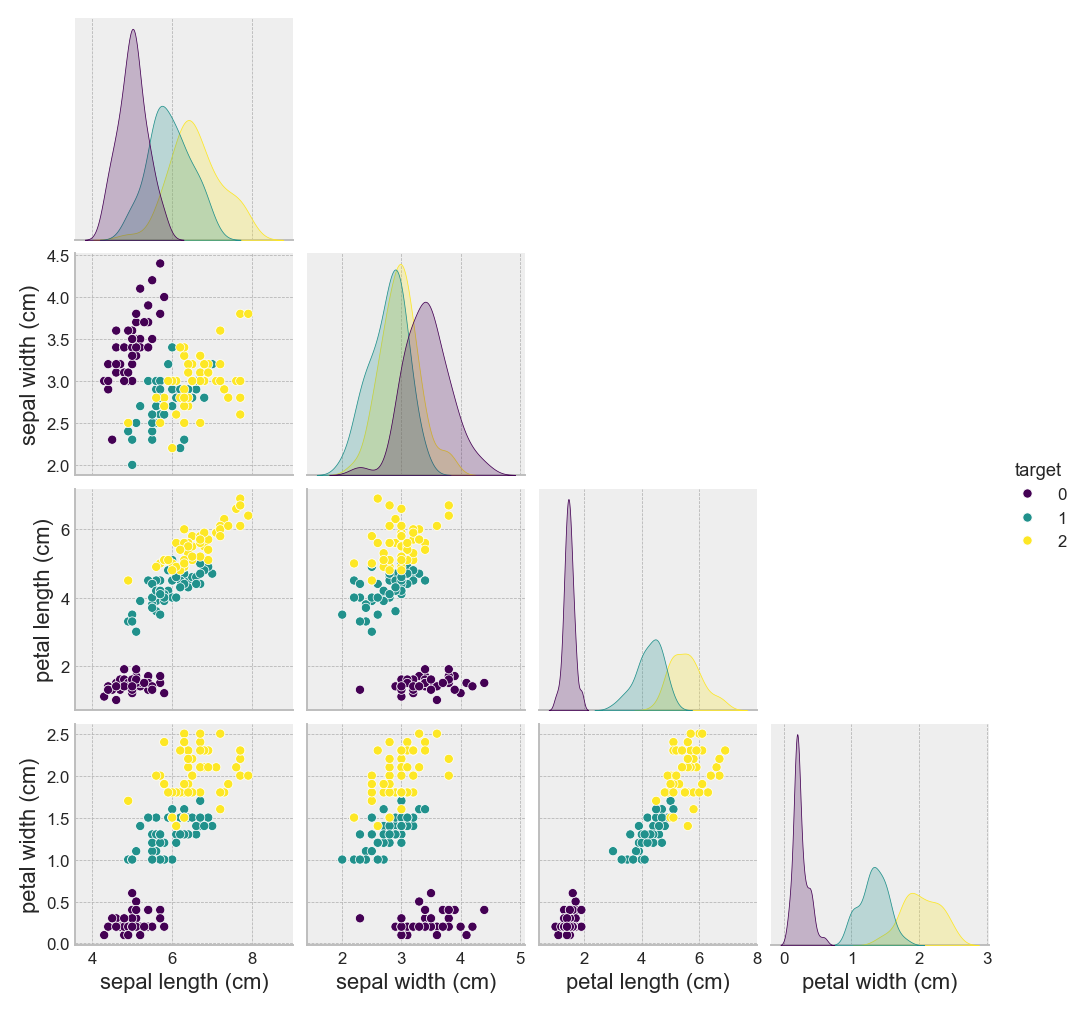

In [14]:
# Pairplot con todas las variables.
sns.pairplot(iris, hue="target", height=2.3, corner=True, palette="viridis");

Podemos observar que cada subespecie de flor en este dataset tiene propiedades tales que, al enfrentar varios pares de atributos, es posible separar claramente una de otra. Formalmente, se dice que un dataset de este tipo es fácilmente **separable**.

Con todo esto en mente, ya podemos avanzar hacia lo que es la API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>**.

## API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>**.
La API de **<font color='mediumorchid'>Scikit-Learn</font>** está diseñada con los siguientes principios fundamentales en mente:

- **Consistencia:** Todos los objetos comparten una interfaz común, con un conjunto limitado de métodos, con documentación consistente.
- **Inspección:** Todos los valores de parámetros específicos son expuestos como atributos públicos.
- **Jerarquía limitada de objetos:** Solamente los algoritmos son representados como clases de Python; los datasets son representados es formatos de tipo estándar (arreglos de **<font color='mediumorchid'>Numpy</font>**, DataFrames de **<font color='mediumorchid'>Pandas</font>**, matrices dispersas de **<font color='mediumorchid'>Scipy</font>**), y los nombres de cada parámetro son simplemente strings de Python.
- **Composición:** Muchos problemas de machine learning pueden ser expresados como secuencias de algoritmos más fundamentales, y **<font color='mediumorchid'>Scikit-Learn</font>** hace uso de ello cada vez que sea posible.
- **Valores por defecto sensibles:** Cuando los modelos requieren parámetros especificados por el usuario, la librería siempre define valores apropiados por defecto para cada uno.

En la práctica, estos principios permiten que **<font color='mediumorchid'>Scikit-Learn</font>** sea extremadamente fácil de utilizar, una vez que dichos principios son entendidos apropiadamente. Cada algoritmo de machine learning en **<font color='mediumorchid'>Scikit-Learn</font>** se implementa mediante la API estimadora, lo que nos provee de una interfaz consistente con un amplio rango de aplicaciones.

### Elementos básicos de la API.
En general, los pasos a la hora de utilizar la API estimadora son los siguientes:

- Escoger una clase que represente la implementación de un determinado algoritmo de aprendizaje, importándola desde el módulo adecuado de **<font color='mediumorchid'>Scikit-Learn</font>** (por ejemplo, el módulo `sklearn.preprocessing` se especializa, como cabría esperar, en operaciones de pre-procesamiento de datos, incluyendo limpiezas, escalamientos y autoimputaciones).
- Escoger los **hiperparámetros** del modelo, generando las debidas instancias dentro de la clase con los valores deseados.
- Presentar la data dentro de una matriz de atributos y un vector objetivo, conforme lo comentado previamente.
- Ajustar el modelo a nuestros datos mediante el método `fit()` de la instancia que define el modelo. Cualquier modelo que implique un ajuste (o cualquier transformación que también lo requiera) siempre vendrá equipado, en su correspondiente clase, con este método.
- Aplicar el modelo a datos nuevos:
    - Para un problema de **aprendizaje supervisado**, en general realizamos predicciones vía el atributo `predict()`. Algunos modelos serán capaces de generar salidas en formato de probabilidades, para lo cual será común el uso del método `predict_proba()`.
    - Para un problema de **aprendizaje no supervisado**, con frecuencia, transformamos o inferimos propiedades mediante métodos tales como `transform()` o `predict()`.

**Ejemplo 2.1 – Un problema sencillo de regresión lineal:** Como ejemplo introductorio, consideremos un problema sencillo de regresión lineal. Vale decir, queremos ajustar una recta a un conjunto de datos en $\mathbb{R}^{2}$, comúnmente con ruido, que suele representarse por medio de un par $(x_{i}, y_{i})$, para un total de $m$ instancias (donde $i=1,...,m$). Para ejemplificar como implementar rápidamente un modelo de regresión lineal en **<font color='mediumorchid'>Scikit-Learn</font>**, crearemos algo de data sencilla haciendo uso del generador de números pseudoaleatorios de **<font color='mediumorchid'>Numpy</font>**:

In [15]:
# Definimos una semilla aleatoria fija.
rng = np.random.default_rng(42)

In [16]:
# Definimos un total de 50 puntos del tipo (X, y).
X = 10 * rng.random(size=50)
y = 2 * X - 1 + rng.normal(loc=0, scale=1, size=50)

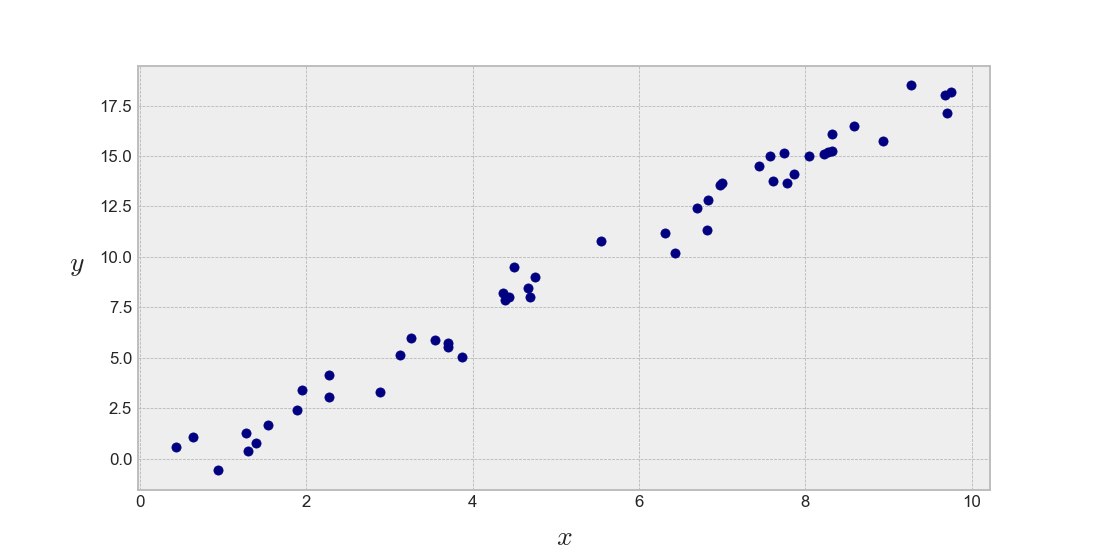

In [17]:
# Graficamos nuestro conjunto de datos.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, color="navy", marker="o")
ax.set_xlabel(r"$x$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=18, labelpad=15, rotation=0);

Con esta data ya definida, podemos utilizar la receta comentada previamente:

**<font color='darkred'>Paso 1 – Escoger una clase que define el modelo a implementar:</font>** En **<font color='mediumorchid'>Scikit-Learn</font>**, cada algoritmo de aprendizaje está representada por una clase de Python, las cuales se empaquetan en módulos que se corresponden con una determinada clase de algoritmos de aprendizaje. De esta manera, para el caso de modelos de regresión lineal generalizados, siempre buscaremos alternativas de algoritmos en el módulo `sklearn.linear_model`. Así, por ejemplo, si queremos desarrollar un modelo de regresión línea simple, podemos importar la clase `LinearRegression` de dicho módulo como sigue:

In [18]:
from sklearn.linear_model import LinearRegression

**<font color='darkred'>Paso 2 – Escoger los hiperparámetros del modelo:</font>** Cada algoritmo de aprendizaje es todo un mundo de opciones, e intentaremos describir tales opciones en un contexto general. Por ejemplo, la clase `LinearRegression` permite implementar un modelo de regresión lineal múltiple con base en un ajuste de mínimos cuadrados. Este modelo particular cuenta con algunos hiperparámetros:

- `fit_intercept`: Corresponde a un parámetro booleano que permite definir si el modelo a construir contará o no con un parámetro de sesgo. Como ya hemos visto en otras ocasiones, el modelo de regresión lineal puede escribirse, para el caso de $n$ atributos y una instancia $i$-ésima, como $y_{i}=\theta_{0}+\sum_{j=1}^{n}\theta_{j}x_{ij}$, siendo $\theta_{0}$ el mencionado parámetro de sesgo y $\mathbf{\theta}=(\theta_{1},...,\theta_{n})\in \mathbb{R}^{n}$ en vector donde agrupamos los parámetros (coeficientes) del modelo. Si `fit_intercept=False`, forzamos a **<font color='mediumorchid'>Scikit-Learn</font>** a que $\theta_{0}$ sea igual a cero.
- `positive`: Se trata de otro parámetro booleano, que permite forzar a **<font color='mediumorchid'>Scikit-Learn</font>** a que el ajuste sea tal que $\theta_{j}>0; \forall j=1,...,n$.

Los hiperparámetros definen las características propias que tendrá nuestro modelo y que dependen íntegramente de nuestro criterio como expertos en cada caso. Por esta razón, dependiendo de la clase que hayamos escogido, al seleccionar tales hiperparámetros, debemos hacer siempre el ejercicio de responder algunas de las siguientes preguntas:

- ¿Queremos que el ajuste incluya algún parámetro de sesgo (como un coeficiente de intercepción, en el caso del modelo de regresión lineal)?
- ¿Nos gustaría que el modelo esté normalizado (vale decir, que previamente tengamos que escalar nuestra matriz de atributos, de tal forma que cada una de las variables siga una distribución normal estándar)?
- ¿Queremos pre-procesar nuestros atributos para darle más flexibilidad a nuestro modelo (por ejemplo, implementar alguna transformación sobre los datos categóricos, o estandarizar datos numéricos)?
- ¿Qué nivel de regularización queremos implementar en nuestro modelo (a fin de reducir algunos problemas que veremos más adelante)?

Estos son ejemplos de decisiones importantísimas que debemos tomar una vez que hemos seleccionado la clase de modelo que queremos utilizar. Tales elecciones, con frecuencia, están representadas por hiperparámetros. En **<font color='mediumorchid'>Scikit-Learn</font>**, los hiperparámetros se escogen pasando sus respectivos valores cuando instanciamos una clase. No constituyen una decisión fácil, y muchas veces nuestro criterio no bastará para escoger un valor adecuado para cada uno. Pero toda línea base (es decir, un *primer modelo* contra el cual contrastaremos otros más sofisticados) requiere de tener una mínima noción de cuáles hiperparámetros utilizar.

Habiendo establecido lo anterior, vamos a construir pues un modelo de regresión lineal que sí disponga de un parámetro de sesgo. De esta manera, instanciaremos la clase `LinearRegression` a una variable llamada `model`, sobre la cual trabajaremos en forma posterior:

In [19]:
# Instanciamos nuestro modelo.
model = LinearRegression(fit_intercept=True)

In [20]:
# Mostramos esta instancia en pantalla.
model

LinearRegression()

Debemos tener en consideración que, cuando un modelo es instanciado, la única acción que ejecutamos es el almacenamiento de los respectivos hiperparámetros. En particular, aún no hemos realizado ningún ajuste del modelo a nuestros datos: La API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>** deja muy claro esto: No es lo mismo escoger un modelo que aplicarlo.

**<font color='darkred'>Paso 3 – Arreglar nuestra data en una matriz de atributos y un vector objetivo:</font>** Unas líneas atrás detallamos cómo es la representación de la data en **<font color='mediumorchid'>Scikit-Learn</font>**, la cual requiere una matriz de atributos bidimensional y un vector objetivo unidimensional. Aquí, nuestra variable objetivo ya tiene la geometría correcta (con tamaño `n_samples`):

In [21]:
# El vector de valores objetivo ya es unidimensional.
y.shape

(50,)

Sin embargo, necesitamos manipular la matriz de atributos `X` a fin de que cumpla con la geometría deseada, porque dicha matriz únicamente tiene una columna (ya que el modelo es univariante):

In [22]:
# Re-arreglamos nuestra matriz de atributos X.
X = X.reshape(-1, 1)

**<font color='darkred'>Paso 4 – Ajuste del modelo a nuestra data:</font>** Ahora es tiempo de aplicar nuestro modelo a nuestros datos. Esto puede lograrse rápidamente con el método `fit()`:

In [23]:
# Ajustamos nuestro modelo.
model.fit(X, y)

LinearRegression()

El uso del método `fit()` genera una (a veces, enorme) cadena de operaciones internas, dependientes por supuesto del modelo escogido, almacenándose cada uno de los resultados en atributos específicos de la clase del modelo que, una vez realizado el ajuste, podemos explorar vía métodos o atributos.

En **<font color='mediumorchid'>Scikit-Learn</font>**, por convención, todos los parámetros de un modelo que fueron aprendidos mediante el método `fit()` se especifican siempre como atributos con un guión bajo (*underscore*, `_`) como sufijo. Por ejemplo, para el caso del modelo que ajustamos previamente, tenemos:

In [24]:
# Pendiente de la recta de ajuste (con más variables, se muestran todos los coeficientes).
model.coef_

array([2.01207601])

In [25]:
# Parámetro de sesgo del modelo (coeficiente de intercepción).
model.intercept_

-1.2313410667136875

Estos dos parámetros representan la pendiente y el coeficiente de intercepción de la recta de regresión obtenida. Si comparamos esto con el bloque de código donde generamos la data en primera instancia, veremos que están relativamente cerca de los valores originales, 2 y -1, respectivamente.

**<font color='darkred'>Paso 5 – Predecir valores para datos nuevos:</font>** Una vez que ya hemos entrenado un modelo, la tarea principal del aprendizaje supervisado corresponde a la evaluación de dicho modelo basado en lo que éste predice en datos que no fueron parte de su conjunto de datos de entrenamiento, lo que se lograen este caso por medio del método `predict()`. Por ejemplo:

In [26]:
# Generamos algo de data nueva
X_new = np.linspace(start=-1, stop=11, num=50)

In [27]:
# Redimensionamos el arreglo anterior.
X_new = X_new.reshape(-1, 1)

In [28]:
# Obtenemos predicciones para estos datos nuevos.
y_new_pred = model.predict(X_new)

Si comparamos las predicciones obtenidas con los puntos previamente generados por medio de un gráfico, obtenemos el siguiente resultado:

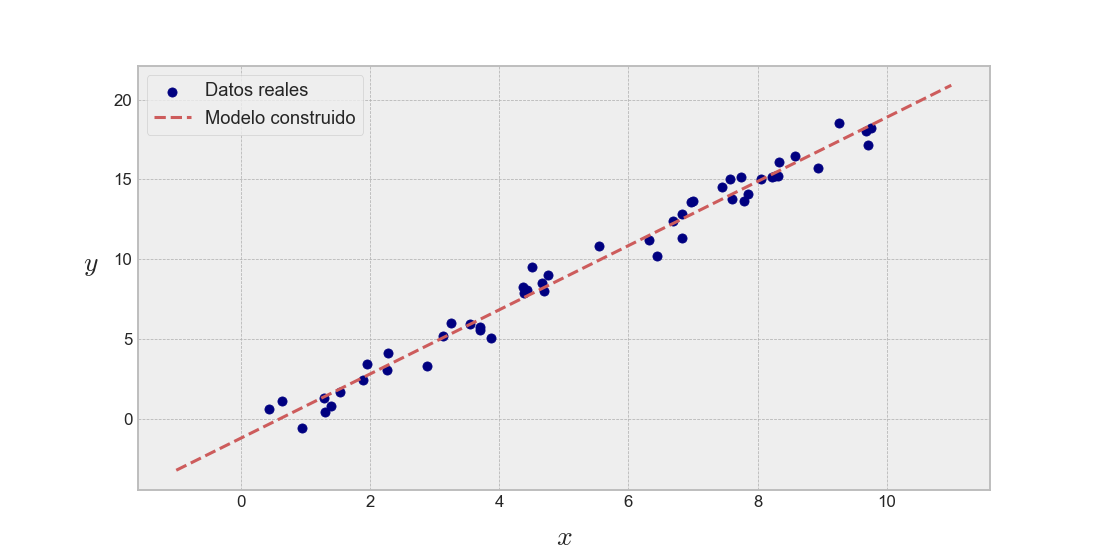

In [29]:
# Graficamos nuestros resultados.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, color="navy", marker="o", label="Datos reales")
ax.plot(X_new, y_new_pred, color="indianred", linestyle="--", label="Modelo construido")
ax.legend(loc="best", fontsize=12, frameon=True)
ax.set_xlabel(r"$x$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=18, labelpad=15, rotation=0);

◼︎

Típicamente, la calidad de un modelo se contraste con respecto a una determinada línea base, como veremos en el siguiente ejemplo.

**Ejemplo 2.2 – Un problema sencillo de clasificación:** Vamos a ilustrar un ejemplo de implementación de modelo de clasificación en este caso, haciendo uso del *toyset* **<font color='forestgreen'>IRIS</font>**, que ya cargamos previamente. En un modelo de clasificación intentamos predecir las categorías a las cuales pertenecen las instancias de un conjunto de datos, las que en este dataset particular se corresponden con las subespecies de flor Iris para cada observación.

Para este problema, trabajaremos con un algoritmo de aprendizaje extremadamente simple conocido como **modelo de Bayes ingenuo** (del inglés *Naive Bayes*). Dado que es un modelo de ajuste muy rápido y sin hiperparámetros que debamos definir, este modelo de Bayes ingenuo típicamente conforma una **línea base** bastante buena a la hora de trabajar en cualquier problema de clasificación de información, antes de explorar otras alternativas de mayor complejidad.

Nos gustaría evaluar nuestro modelo en data que no haya visto durante su entrenamiento, por lo cual haremos una división del dataset en dos subconjuntos bien definidos: Un **conjunto de entrenamiento** y un **conjunto de prueba**. Esto podría perfectamente realizarse a mano, pero **<font color='mediumorchid'>Scikit-Learn</font>** nos ofrece de varias opciones para separar un dataset completo en tales subconjuntos, todas ellas en el módulo `sklearn.model_selection`. Un ejemplo es la función `train_test_split()`, la que permite dividir un conjunto de datos con base en una proporción de datos que se irán al conjunto de prueba, sin tener en consideración el orden de los datos ni tampoco su distribución con respecto a cada subconjunto de interés (como veremos más adelante, este último punto puede resultar ser muy importante):

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Nuevamente, asignamos la matriz de atributos y el vector de valores objetivo relativos al
# dataset IRIS.
X = iris_dataset["data"]
y = iris_dataset["target"]

In [32]:
# Separamos nuestro dataset en conjuntos de entrenamiento y de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Notemos que la función `train_test_split()` acepta directamente la matriz de atributos `X` y el arreglo de valores objetivo `y` como entradas, creando una estructura exactamente igual a esta, pero separada en conjuntos de entrenamiento (`X_train` e `y_train`) y de prueba (`X_test` e `y_test`). La proporción de cuánta data queramos dejar fuera del entrenamiento y pasarla al conjunto de prueba siempre puede controlarse mediante el argumento `test_size`, el cual es un valor que va desde 0 a 1, y representa dicha proporción en tanto por uno. En este ejemplo, hemos dejado un 20% de los datos para el conjunto de prueba.

Prácticamente todas las herramientas provistas por **<font color='mediumorchid'>Scikit-Learn</font>** cuentan con el parámetro `random_state`, el que establece una **semilla aleatoria fija** para mantener la **reproducibilidad** de cualquier experimento que hagamos haciendo uso de modelos o transformadores de esta librería.

Con la data ya separada en conjuntos de entrenamiento y de prueba, seguimos nuestra receta para llegar a nuestras predicciones. En este caso particular, el modelo de Bayes ingenuo puede implementarse rápidamente por medio de la clase `GaussianNB`, la cual depende del módulo `sklearn.naive_bayes`. Recordemos que el objetivo de esta sección no es aprender a implementar modelos, sino simplemente mostrar como funciona la API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>**. Ya nos preocuparemos de describir en detalle varios algoritmos de aprendizaje y sus correspondientes implementaciones en **<font color='mediumorchid'>Scikit-Learn</font>** en las secciones siguientes:

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
# Instanciamos el modelo.
model = GaussianNB()

In [35]:
# Ajustamos el modelo.
model.fit(X_train, y_train)

GaussianNB()

In [36]:
# Realizamos predicciones.
y_test_pred = model.predict(X_test)

Luego utilizamos alguna métrica de calidad adecuada para, valga la redundancia, medir la calidad del ajuste de nuestro modelo. En este caso, usaremos una métrica conocida como **exactitud**, la cual corresponde a la proporción de categorías con respecto al total que el modelo es capaz de estimar correctamente. Las métricas de desempeño de los modelos de **<font color='mediumorchid'>Scikit-Learn</font>** *viven* en el módulo `sklearn.metrics`, y puntualmente la exactitud puede implementarse por medio de la función `accuracy_score()`. Toda métrica relativa a modelos de aprendizaje supervisado requiere de dos parámetros: `y_true` (el valor objetivo real propio del dataset) e `y_pred` (el valor que hemos predicho a partir de nuestro modelo). Luego tenemos:

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
# Calculamos la exactitud de nuestro modelo en los datos de prueba.
acc_score = accuracy_score(y_true=y_test, y_pred=y_test_pred)

In [39]:
# Mostramos este valor en pantalla.
print(f"Exactitud del modelo: {100 * round(acc_score, 3)}%")

Exactitud del modelo: 83.3%


El valor de exactitud que hemos obtenido es, por tanto, nuestra **línea base**. Y contra ese valor es que competiremos a la hora de construir modelos más sofisticados. ◼︎

Si bien los algoritmos de aprendizaje supervisado serán abordados en la Parte III de este repositorio, es bueno que observemos igualmente cómo **<font color='mediumorchid'>Scikit-Learn</font>** suele trabajar modelos de esta naturaleza. Esto se ilustrará en el siguiente ejemplo, pero siempre bajo la premisa de que no queremos (aún) aprender en detalle a implementar modelos de este tipo. Sólo estamos observando como trabaja la API de **<font color='mediumorchid'>Scikit-Learn</font>**.

**Ejemplo 2.3 – Reducción de la dimensión del toyset <font color='forestgreen'>IRIS</font>:** Como ejemplo de problema de aprendizaje no supervisado, veamos como podemos reducir la dimensión del dataset **<font color='forestgreen'>IRIS</font>** a fin de que su visualización sea más sencilla. Con *reducir la dimensión* de un dataset nos referimos, de manera general, a que si dicho dataset consiste de un total de $n$ atributos, queremos preservar la mayor cantidad de información posible del mismo usando únicamente $k$ de esas variables, siendo $k<n$.

Recordemos que, conforme lo visto previamente, el dataset **<font color='forestgreen'>IRIS</font>** tiene cuatro dimensiones (cuatro atributos, además de la variable de respuesta).

El objetivo de la reducción de la dimensión en un conjunto de datos es pues cuestionar si existe una representación del mismo que permita retener la mayor cantidad de información posible del mismo, pero con una cantidad menor de atributos. Con frecuencia, esta técnica es utilizada para obtener representaciones visuales optimizadas de un dataset, ya que, después de todo, es más sencillo (por no decir *plausible*) graficar datos bidimensionales que tetradimensionales.

En este ejemplo, implementaremos un algoritmo de aprendizaje no supervisado conocido como **análisis de componentes principales** (PCA, del inglés *principal component analysis*), la cual constituye el algoritmo de reducción de dimensionalidad a escala lineal más sencillo que tenemos a nuestra disposición, y que está basado casi enteramente en una aplicación muy elegante de la descomposición de valores singulares. Requeriremos que este modelo nos devuelva únicamente dos componentes de la data; es decir, una representación bidimensional de un dataset que, como sabemos, es tetradimensional.

Los algoritmos de aprendizaje no supervisado que tienen como objetivo reducir las dimensiones de un dataset *viven* en el módulo `sklearn.decomposition`. En este caso particular, el análisis de componentes principales, en su versión más elemental, suele implementarse mediante la clase `PCA`, en la cual seteamos el parámetro `n_components` para determinar el número de atributos (componentes) al que queremos llegar, que en este ejemplo particular son dos. Tales componentes no serán dos de las variables originales del dataset, sino que dos variables que resultan de una transformación en la cual intentamos capturar la mayor cantidad posible de información (representada por la varianza inherente del dataset), y que serán ortogonales entre sí en un dominio del plano $\mathbb{R}^{2}$.

De nuestra ya conocida receta, tenemos que:

In [40]:
from sklearn.decomposition import PCA

In [41]:
# Ajustamos el modelo a nuestra matriz de atributos (notemos que no usamos las etiquetas presentes
# en el vector de valores objetivo).
model = PCA(n_components=2)

In [42]:
# Ajustamos el modelo a la totalidad de los datos.
model.fit(X)

PCA(n_components=2)

In [43]:
# Transformamos nuestro dataset, a fin de obtener las componentes resultantes.
X_2D = model.transform(X)

In [44]:
# ... las cuales son, efectivamente, dos.
X_2D.shape

(150, 2)

Hemos ganado, por tanto, una representación de la data que consta únicamente de dos atributos, en vez de los cuatro originales. Si graficamos tales componentes, podremos diferenciar inmediatamente donde se emplaza cada categoría (subespecie) de flor Iris:

In [45]:
# Agregamos las componentes obtenidas al DataFrame original que contiene al dataset IRIS.
iris["PC1"] = X_2D[:, 0]
iris["PC2"] = X_2D[:, 1]

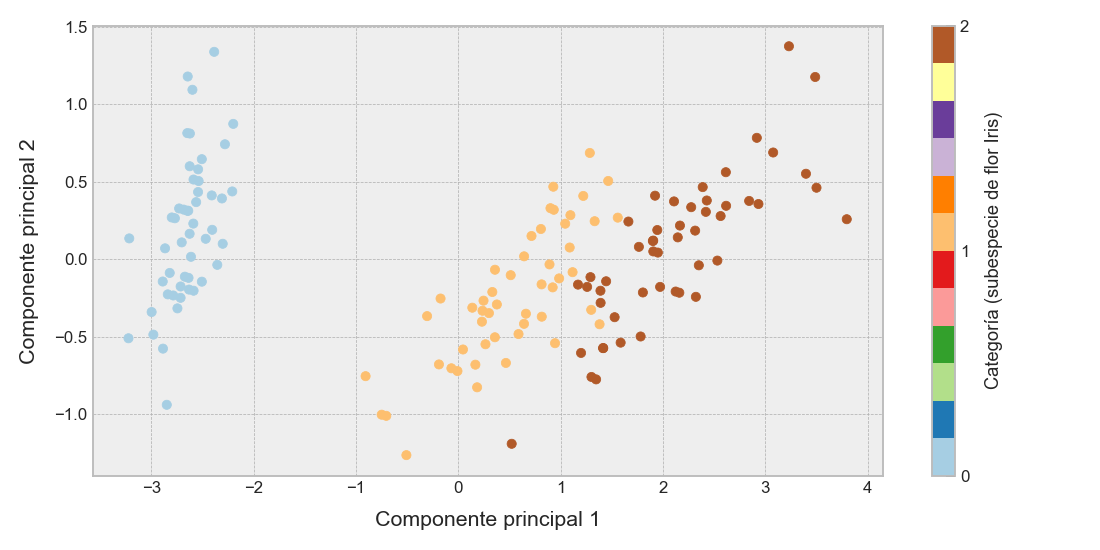

In [46]:
# Graficamos las componentes obtenidas.
fig, ax = plt.subplots(figsize=(10, 5))
p = ax.scatter(x=iris["PC1"], y=iris["PC2"], c=iris["target"], cmap="Paired")
cb = fig.colorbar(p)
cb.ax.locator_params(nbins=3)
cb.set_label("Categoría (subespecie de flor Iris)", fontsize=12, labelpad=10)
ax.set_xlabel("Componente principal 1", fontsize=14, labelpad=10)
ax.set_ylabel("Componente principal 2", fontsize=14, labelpad=10)
plt.tight_layout();

Vemos entonces que, en la representación bidimensional de nuestra data, las distintas especies de Iris son fácilmente distinguibles (separables), incluso aunque el algoritmo de PCA no tiene ni la más mínima idea de dicho concepto de especie. Esto nos indica que un modelo de clasificación relativamente sencillo debiera poder discriminar razonablemente bien estas clases. ◼︎

**Ejemplo 2.4 – Agrupamiento (clustering) del toyset <font color='forestgreen'>IRIS</font>**: Otra aplicación importante de los algoritmos de aprendizaje supervisado corresponde al agrupamiento de instancias en un dataset a partir de ciertas similitudes entre los datos. Tales *similitudes* no son las mismas de algoritmo a algoritmo. Algunas implementaciones toman como métrica de similitud distancias euclidianas con respecto a un *centroide* previamente seteado en nuestro conjunto de datos, mientras que otras buscan similitudes a partir de la función de densidad conjunta que permite describir el vector aleatorio a partir del cual se han *muestreado* las variables que constituyen el dataset completo, usualmente asumiendo que dicha función de densidad es una mezcla o mixtura de otras densidades más simples. Esta es precisamente la idea detrás de los llamados **modelos de mixtura Gaussiana**, donde asumimos que la función de densidad es una mixtura de otras densidades de tipo normal.

Los modelos de mixtura *viven* en el módulo `sklearn.mixture`. En nuestro caso particular, haremos uso de la clase `GaussianMixture` para implementar un modelo de mixtura Gaussiana muy sencillo, de manera tal que, a partir de la densidad observada en el dataset **<font color='forestgreen'>IRIS</font>**, podamos inferir similitudes entre cada instancia. Por regla general, el número de grupos a los que asociaremos estas instancias es un hiperparámetro, el cual setearemos, para este caso particular, en 3. También setearemos en parámetro `covariance_type` en `full`, lo que implicará que cada componente de mixtura tendrá su propia matriz de covarianza, la cual puede tomar cualquier tipo de ordenamiento:

In [47]:
from sklearn.mixture import GaussianMixture

In [48]:
# Instanciamos nuestro modelo.
model = GaussianMixture(n_components=3, covariance_type="full")

In [49]:
# Ajustamos nuestro modelo.
model.fit(X)

GaussianMixture(n_components=3)

In [50]:
# Predecimos los grupos o clusters a los cuales pertenecerá cada instancia según nuestro modelo.
y_gmm = model.predict(X)

Vamos a incorporar esta información al dataset original, y graficaremos nuestros resultados:

In [51]:
# Añadimos los clusters al dataset original.
iris["cluster"] = y_gmm

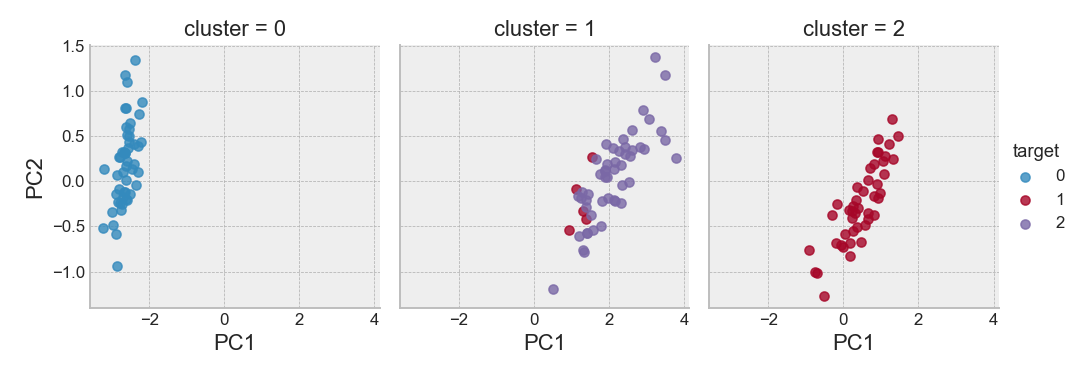

In [52]:
# Graficamos los resultados.
sns.lmplot(x="PC1", y="PC2", data=iris, hue='target', col='cluster', height=3.4, fit_reg=False, aspect=0.9);

Podemos observar que los clusters determinados por nuestro modelo son muy similares a las categorías que especifican las subespecies de Iris que son representadas por cada una de las instancias del modelo, existiendo una superposición más evidente en el cluster número 2, donde una pequeña fracción de instancias de la subespecie Iris Versicolor (`target=1`) se traslapa con instancias que pertenecen a la clase Iris Virginica (`target=2`). ◼︎

**Ejemplo 2.5 – Un ejemplo que considera el uso de imágenes:** Vamos a aplicar las recetas que hemos mostrado previamente a un problema cuyo conjunto de datos está compuesto por imágenes. Para ello, haremos uso de otro *toyset* muy conocido en el mundo de la ciencia de datos, llamado **<font color='forestgreen'>DIGITS</font>**, el cual está compuesto por un total de 1797 imágenes de 8$\times$8 pixeles, cada una de las cuales muestra un determinado dígito, del 0 al 9, los cuales fueron escritos a mano por un total de 60 personas. Estas imágenes están etiquetadas por un número, también del 0 al 9, que representa el dígito con el cual se corresponde a cada una.

Para cargar este *toyset* por medio de **<font color='mediumorchid'>Scikit-Learn</font>**, usaremos la función `load_digits()`, la cual podemos importar desde el módulo `sklearn.datasets`:

In [53]:
from sklearn.datasets import load_digits

In [54]:
# Cargamos nuestro dataset.
digits = load_digits(as_frame=True)

In [55]:
# Y mostramos en pantalla la descripción del mismo.
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Este dataset es famoso porque ha sido usado por infinidad de investigadores y profesionales para probar sistemas de reconocimiento de imágenes basados en algoritmos de aprendizaje. En la práctica, aquello involucra ambos, localizar e identificar caracteres en una imagen, de tal manera que un modelo pueda discriminar a qué dígito representa cada una de ellas.

Las imágenes, como ya hemos comentado en el repositorio de [Análisis de Datos](https://github.com/rquezadac/udd_data_analytics_lectures/tree/main), suelen representarse en una escala de grises por medio del uso de arreglos bidimensionales, de tal forma que la geometría de estos arreglos define las dimensiones de la imagen. En el siguiente bloque de código visualizaremos las primeras cien imágenes de este conjunto de datos:

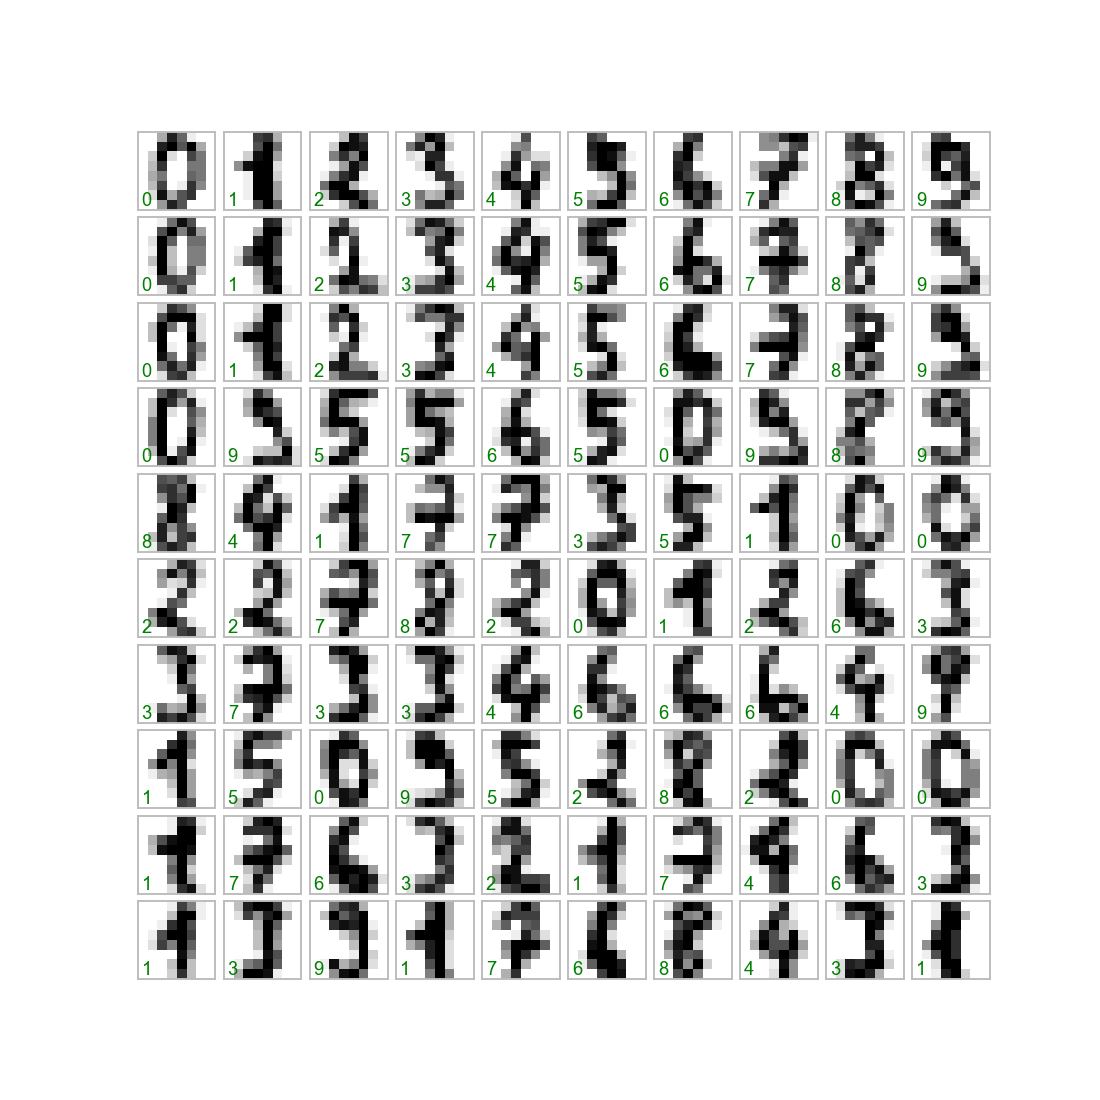

In [56]:
# Visualizamos las primeras 100 imágenes de este dataset.
fig, axes = plt.subplots(
    nrows=10, ncols=10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, 
    gridspec_kw=dict(hspace=0.1, wspace=0.1)
)
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green');

En la imagen anterior, hemos establecido además la etiqueta asociada a cada una de estas imágenes, a fin de aclarar qué dígito representa cada una de ellas.

A fin de trabajar con este conjunto de datos en **<font color='mediumorchid'>Scikit-Learn</font>**, necesitamos una matriz de atributos que especifique las correspondientes variables independientes que describen el dataset completo. Podemos lograr aquello tratando a cada pixel en la imagen como un atributo distinto: Esto es, aplanando el arreglo original que representa a una imagen arbitraria (que, por ser de 8$\times$8 pixeles, tiene una geometría `(8, 8)`), de manera que obtengamos un arreglo de morfología `(1797, 64)`; es decir, las 1797 instancias y las 64 posiciones distintas que ocupa un pixel en cada imagen. 

Adicionalmente, necesitamos el vector de valores objetivo, el que corresponde a la clase o categoría que establece a qué número corresponde cada dígito. Ambos arreglos están construidos dentro del dataset provisto por **<font color='mediumorchid'>Scikit-Learn</font>**, mapeados por las llaves `"data"` y `"target"`, igual que en el caso del *toyset* **<font color='forestgreen'>IRIS</font>**:

In [57]:
# Matriz de atributos de nuestro dataset.
X = digits["data"]

In [58]:
# Arreglo de valores objetivo de nuestro dataset.
y = digits["target"]

Es evidente que sería extraordinario visualizar nuestro dataset en un espacio de 64 dimensiones (porque, recordemos, cada instancia del mismo es un vector $\mathbf{x}_{i}\in \mathbb{R}^{64}$), pero aquello está más allá de lo que podemos hacer. En vez de ello, reduciremos el número de dimensiones de este dataset a sólo dos, haciendo uso de un algoritmo de aprendizaje supervisado que se especialice en la reducción de dimensiones de un conjunto de datos. A diferencia de lo que hicimos antes con el *toyset* **<font color='forestgreen'>IRIS</font>**, donde aplicamos un sencillo análisis de componentes principales, esta vez implementaremos un modelo más sofisticado, donde intentaremos *aprender* la estructura intrínseca al dataset sin restringirnos a una descripción geométrica euclidiana. Esto se conoce como **aprendizaje de variedades**, donde la palabra *variedad* hace referencia a una abstracción conocida como [*variedad diferencial*](https://en.wikipedia.org/wiki/Manifold), y que es un objeto que generaliza el concepto de (híper)superficie en un espacio arbitrario. Puntualmente, haremos uso de un método llamado **ISOMAP**, el cual es capaz de determinar los aspectos geométricos de la variedad donde *vive* el dataset, a fin de reducir su dimensión tomando en cuenta dicha geometría, en vez de simplemente reducir todo a componentes lineales ortogonales entre sí (como ocurre con el análisis de componentes principales). Esto es mucha información, pero no nos preocupemos de los detalles por ahora (insistimos, ya llegaremos a las secciones donde abordaremos estos algoritmos en detalle).

Los algoritmos de aprendizaje de variedades de **<font color='mediumorchid'>Scikit-Learn</font>** están disponibles en el módulo `sklearn.manifold`. Puntualmente, el modelo ISOMAP puede implementarse mediante la clase `Isomap`, en la cual especificaremos que deseamos reducir la dimensión de nuestro dataset de $\mathbb{R}^{64}$ a $\mathbb{R}^{2}$ haciendo uso del parámetro `n_components`:

In [59]:
from sklearn.manifold import Isomap

In [60]:
# Instanciamos nuestro modelo.
model = Isomap(n_components=2)

In [61]:
# Ajustamos nuestro dataset (solamente las imágenes) a este modelo.
model.fit(X)

/Users/felipequezada/.local/share/virtualenvs/udd_data_science_lectures-cIJkRdo8/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/felipequezada/.local/share/virtualenvs/udd_data_science_lectures-cIJkRdo8/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Isomap()

In [62]:
# Y retornamos finalmente las componentes resultantes de la transformación.
X_2D = model.transform(X)

In [63]:
# Notemos que este nuevo dataset reducido tiene sólo dos variables.
X_2D.shape

(1797, 2)

Vamos a graficar el resultado de nuestro trabajo. Queremos observar, para las componentes obtenidas, si efectivamente cada dígito es un cluster en sí mismo:

/var/folders/sn/hlgjzv2n1537dplx8bvvj1c80000gn/T/ipykernel_9860/3049329349.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  alpha=0.7, cmap=plt.cm.get_cmap('Paired', 10)


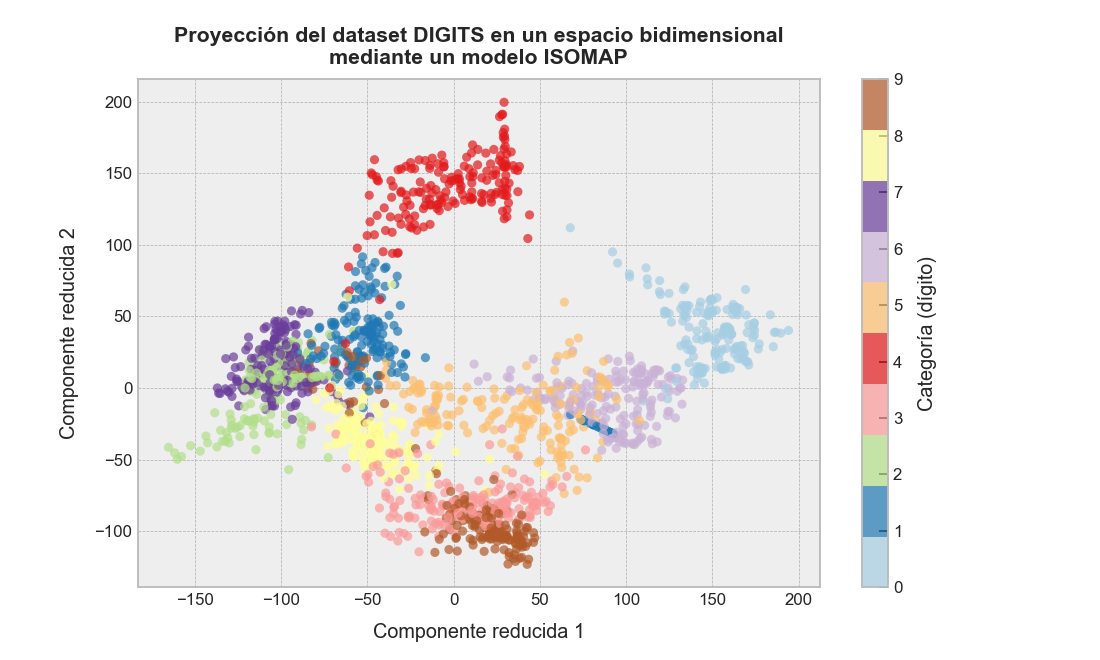

In [64]:
# Graficamos los resultados.
fig, ax = plt.subplots(figsize=(10, 6))
p = ax.scatter(
    x=X_2D[:, 0], y=X_2D[:, 1], c=y, edgecolor='none',
    alpha=0.7, cmap=plt.cm.get_cmap('Paired', 10)
)
cb = fig.colorbar(p)
cb.set_label(label='Categoría (dígito)', fontsize=13, labelpad=10)
ax.set_xlabel("Componente reducida 1", fontsize=13, labelpad=10)
ax.set_ylabel("Componente reducida 2", fontsize=13, labelpad=10)
ax.set_title(
    "Proyección del dataset DIGITS en un espacio bidimensional"
    + "\nmediante un modelo ISOMAP", fontsize=14, fontweight="bold",
    pad=10
);

Este gráfico nos entrega una buena idea respecto a qué tan separados están estos números en un espacio de 64 dimensiones. Por ejemplo, los ceros (en celeste) y unos (en azul) presentan una superposición mínima en esta representación, lo que es algo razonable, ya que los ceros tienen tinta en forma de corona en la parte central de la imagen, mientras que los unos representan en general un único filamento en la zona central. En cualquier caso, los dígitos parecen estar bien diferenciados en el dominio de atributos bidimensional que hemos construido, lo que implica que un modelo de clasificación no debiera tener mayores problemas a la hora de ajustarse a este conjunto de datos.

Intentemos pues ajustar un modelo de clasificación a estos datos. Para ello, seguiremos la receta y separaremos nuestro dataset en un conjunto de entrenamiento y un conjunto de prueba, donde el último constará de un 20% del total de los datos:

In [65]:
# Creamos nuestros conjuntos de entrenamiento y de prueba (ya formateados como pares (X, y)).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Ahora implementaremos un modelo de clasificación de tipo lineal generalizado, conocido como **máquina de vectores de soporte** (SVM). Este modelo puede implementarse usando la clase `SVC()`, provista por el módulo `sklearn.svm`:

In [66]:
from sklearn.svm import SVC

In [67]:
# Instanciamos nuestro modelo.
model = SVC(random_state=7)

In [68]:
# Ajustamos nuestro modelo a los datos de entrenamiento.
model.fit(X_train, y_train)

SVC(random_state=7)

In [69]:
# Y obtenemos predicciones para los datos de prueba.
y_test_pred = model.predict(X_test)

In [70]:
# Por supuesto, también calcularemos la exactitud de nuestro modelo.
print(f"Exactitud del modelo en datos de prueba = {100 * round(accuracy_score(y_test, y_test_pred), 2)}%")

Exactitud del modelo en datos de prueba = 99.0%


Incluso con este modelo sencillo (o bueno, no *tanto* en verdad...), tenemos un 99% de exactitud sobre los datos de prueba. Sin embargo, este único KPI no nos dice dónde se ha equivocado nuestro modelo. Una forma adecuada de averiguar dónde están los mayores errores que ha cometido nuestro modelo guarda relación con la construcción de una estructura conocida como **matriz de confusión**, la cual permite ordenar las predicciones hechas por el modelo en términos de sus *aciertos* en cada una de las categorías representadas por la variable de respuesta (`y_test`) y las predicciones efectuadas (`y_test_pred`). Dicha matriz puede calcularse fácilmente haciendo uso de la función `confusion_matrix()`, la cual *vive* en el módulo `sklearn.metrics`:

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
# Construimos la matriz de confusión de nuestro modelo sobre los datos de prueba.
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

In [73]:
# Mostramos esta matriz en pantalla.
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 31]])

La matriz de confusión es un concepto que estudiaremos en detalle más adelante. Sin embargo, su estructura es sencilla: Se trata de una matriz cuadrada cuya diagonal principal muestra los *aciertos* del modelo en cada categoría (diez en nuestro caso, ordenadas desde el dígito 0 hasta el dígito 9).  Cualquier valor distinto de cero fuera de la diagonal principal implica que el modelo ha cometido un error clasificando una determinada instancia. En la matriz de confusión anterior, podemos observar que el valor en la posición `(8, 1)` es igual a `2`, lo que significa que nuestro modelo ha confundido en dos oportunidades un valor que es igual a `8`, etiquetándolo incorrectamente como un 1`.

Esta matriz puede graficarse para su mejor comprensión, haciendo uso de un sencillo mapa de calor:

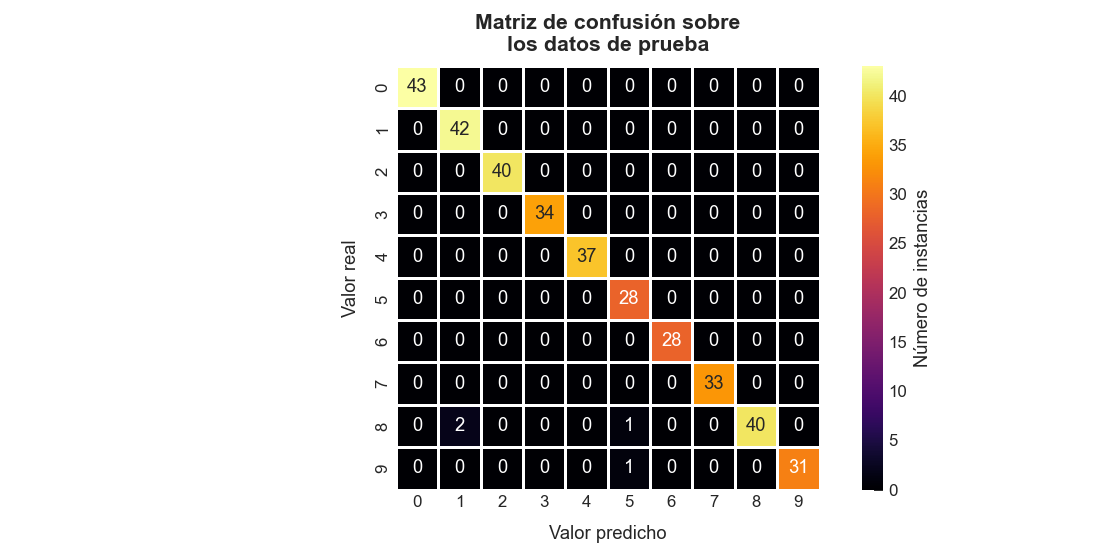

In [74]:
# Graficamos la matriz de confusión.
fig, ax = plt.subplots(figsize=(10, 5))
p = sns.heatmap(
    cm, square=True, annot=True, cbar=True, cmap="inferno", ec="k", 
    lw=0.8, ax=ax, cbar_kws=dict(label="Número de instancias")
)
p.figure.axes[-1].yaxis.label.set_fontsize(12)
ax.set_xlabel('Valor predicho', fontsize=12, labelpad=10)
ax.set_ylabel('Valor real', fontsize=12, labelpad=10)
ax.set_title(
    "Matriz de confusión sobre\nlos datos de prueba", 
    fontsize=14, fontweight="bold", pad=10
);

Otra forma de verificar dónde pueden estar acumulados los errores que comete nuestro modelo, es graficar los dígitos de entrada nuevamente, junto con sus categorías predichas, aunque esto puede resultar problemático para un conjunto tan grande de imágenes. Por lo tanto, ejemplificaremos esto para las primeras 100 imágenes del conjunto de prueba. Usaremos el color rojo para las clasificaciones incorrectas, y el verde para las correctas, con lo cual:

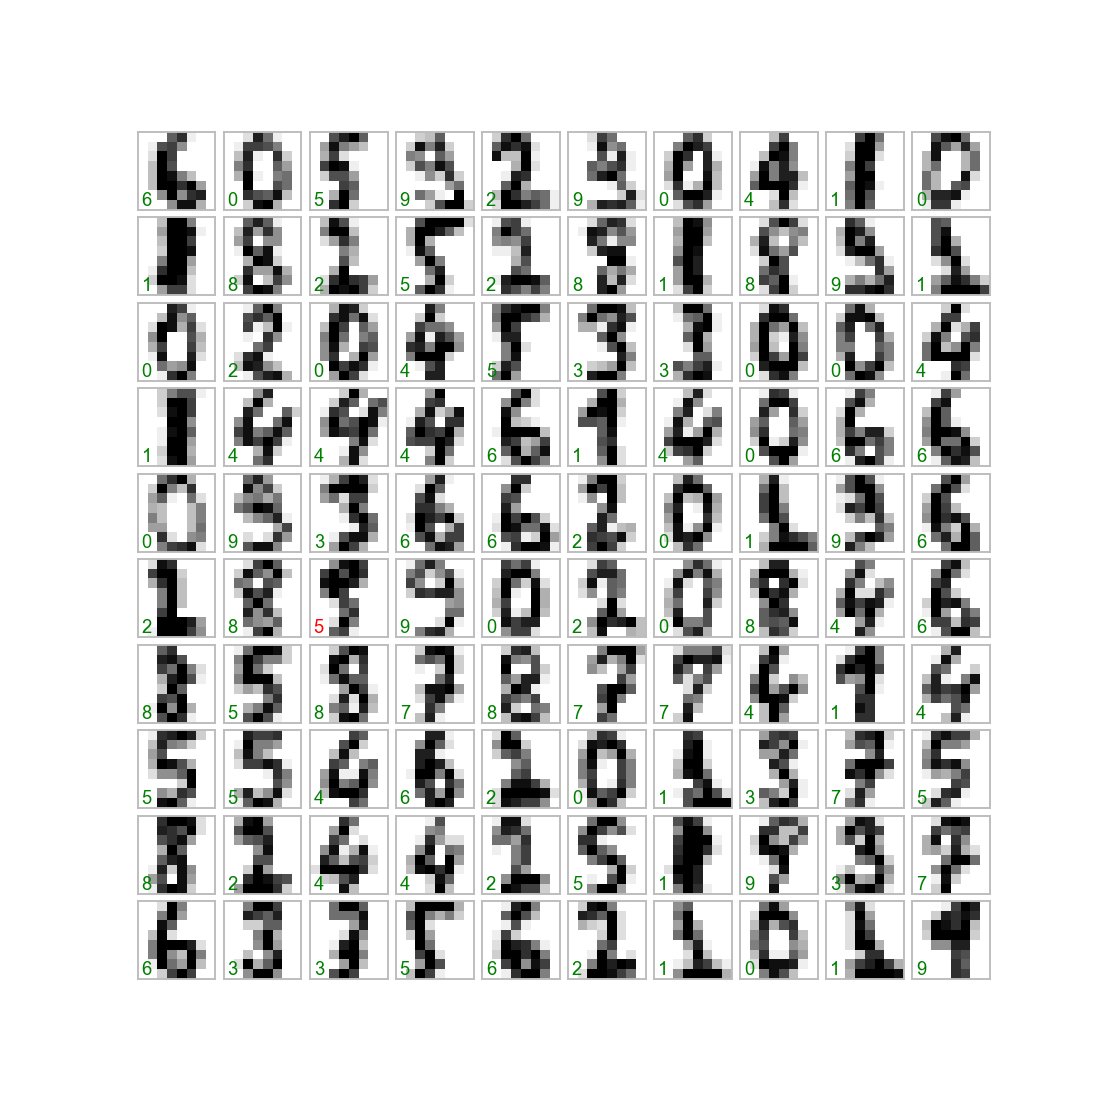

In [75]:
# Graficamos las primeras 100 imágenes del conjunto de prueba y las categorías 
# predichas para cada una.
fig, axes = plt.subplots(
    nrows=10, ncols=10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)
)
test_images = X_test.values.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(
        test_images[i], cmap='binary', interpolation='nearest'
    )
    ax.text(
        0.05, 0.05, str(y_test_pred[i]), transform=ax.transAxes,
        color='green' if (y_test.values[i] == y_test_pred[i]) else 'red'
    );

La examinación de este gráfico nos indica que el modelo se desempeña de manera sorprendente, incluso con lo rápido que lo construimos. Esto, por supuesto, es algo esperable, ya que este dataset no es difícil de aprender por algoritmos de aprendizaje sencillos. No será el caso, en general, cuando nos veamos enfrentados a conjuntos de datos del mundo real. Pero es una primera aproximación razonable para ir examinando lo que seremos capaces de hacer una vez entremos en detalle en todo lo que respecta a la implementación de modelos de machine learning en **<font color='mediumorchid'>Scikit-Learn</font>**. ◼︎

## Hiperparámetros y validación.
Previamente, aprendimos la más esencial de las *recetas* para la implementación de un modelo de machine learning en **<font color='mediumorchid'>Scikit-Learn</font>**:

1. Escoger la clase de un modelo.
2. Escoger los hiperparámetros del modelo.
3. Ajustar el modelo a los datos de entrenamiento.
4. Utilizar el modelo para predecir valores de respuesta para datos nuevos.

Las primeras dos partes de esta receta, la elección del modelo y de sus hiperparámetros, constituyen el eje fundamental a la hora de medir la eficiencia de este tipo de técnicas desde una perspectiva del diseño (e idoneidad) del modelo que hemos elegido para resolver un determinado problema. A fin de realizar una elección adecuada e informada, necesitamos disponer de alguna forma de validar tanto nuestro modelo como sus hiperparámetros en términos de su calidad y ajuste a nuestra data. Y mientras esto puede sonar muy simple en el papel, existen varios problemas que debemos evitar en estas importantes decisiones.

En términos legos, la validación de un modelo corresponde a un proceso más bien simple: Después de escoger un modelo y sus hiperparámetros, podemos estimar qué tan efectivo es aplicándolo a nuestra data de entrenamiento, comparando sus predicciones en relación a los valores reales respectivos.

En lo que sigue, primero mostraremos una aproximación errónea en lo que respecta a la validación de un modelo y explicaremos por qué dicho enfoque falla, antes de pasar a metodologías más robustas, tales como la separación de un conjunto de datos en datos de entrenamiento y datos de prueba (que ya ilustramos previamente), y la validación cruzada (que introducimos teóricamente en la sección anterior). Nuestro objetivo será presentar estas ideas a nivel práctico, pero las volveremos a revistar una vez que desarrollemos ideas más detalladas en relación a la implementación de algoritmos de aprendizaje más esenciales.

### Lo que no debemos hacer...
Demostraremos el enfoque ingenuo para este problema utilizando para ello el *toyset* **<font color='forestgreen'>IRIS</font>**. Ya hemos instanciado este conjunto de datos en la variable `iris_dataset`, así que extraeremos sus variables independientes y dependientes para desarrollar nuestra idea:

In [76]:
# Matriz de atributos del dataset.
X = iris_dataset["data"]

In [77]:
# Vector de valores objetivo del dataset.
y = iris_dataset["target"]

Ahora escogeremos un modelo y sus hiperparámetros. En este ejemplo, haremos uso de un algoritmo de aprendizaje muy simple, llamado **modelo de $k$-vecinos más cercanos**. Para los mineros, este método puede resultar familiar si tenemos alguna noción de la terminología geoestadística, ya que existe un método con el mismo nombre que nos permite estimar leyes de mineral en una grilla regularizada a partir de muestras que han sido extraidas de un yacimiento por medio de sondajes, basándonos en los valores de las $k$-muestras más cercanas al punto de interés, siendo $k$ un hiperparámetro. El algoritmo de aprendizaje se basa exactamente en la misma idea, y usa la distancia euclidiana para determinar tales vecinos y asignar categorías basándose precisamente en aquellas que son espacialmente más cercanas a una instancia en particular.

Este algoritmo de aprendizaje puede implementarse en **<font color='mediumorchid'>Scikit-Learn</font>** por medio de la clase `KNeighborsClassifier`, la cual está disponible en el módulo `sklearn.neighbors`. En nuestro caso particular, intentaremos estimar la subespecie asociada a una flor Iris apoyándonos en la información de su vecino (instancia) más cercano, por lo que el valor de $k$ en este ejemplo será igual a 1. Dicho valor se puede setear mediante el argumento `n_neighbors=1`:

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
# Instanciamos nuestro modelo.
model = KNeighborsClassifier(n_neighbors=1)

In [80]:
# Entrenamos el modelo en el dataset completo y luego hacemos predicciones.
model.fit(X, y)
y_pred = model.predict(X)

Con el modelo ya entrenado y las predicciones listas, calculamos la exactitud del mismo:

In [81]:
print(f"Exactitud del modelo = {100 * round(accuracy_score(y, y_pred), 2)}%")

Exactitud del modelo = 100.0%


Vemos por tanto que la fracción de instancias correctamente clasificadas por el modelo es de un 100%. Podríamos celebrarlo, porque claro… ¡Es una exactitud del 100% para nuestro modelo! Pero en realidad, este número por sí solo no significa mucho, ya que evaluar un modelo con la misma data utilizada para entrenarlo es un error de tipo fundamental. Y esto es porque los algoritmos de machine learning suelen tener el poder suficiente para ajustarse perfectamente a un conjunto de datos de entrenamiento. Esto ilustra la importancia de siempre separar datos de un dataset a fin de usarlos como conjunto de prueba.

### El conjunto de validación.
Podemos pues tener una mejor estimación de la calidad de un modelo apartando una cierta cantidad de data del conjunto de entrenamiento, a fin de utilizarla luego para estimar las métricas de desempeño que requiramos. Por supuesto, como esta data nunca fue vista por el modelo antes, resulta en una estimación más *justa* de su calidad. Esto, como sabemos, puede lograrse mediante la función `train_test_split()` como sigue:

In [82]:
# Dividimos la data en dos conjuntos de igual tamaño
X1, X2, y1, y2 = train_test_split(X, y, random_state=42, train_size=0.5)

In [83]:
# Ajustamos el modelo en uno de estos conjuntos
model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

In [84]:
# Evaluamos el modelo en el otro conjunto
y2_pred = model.predict(X2)

In [85]:
# Y calculamos la exactitud del modelo en dicho conjunto.
print(f"Exactitud del modelo = {100 * round(accuracy_score(y2, y2_pred), 2)}%")

Exactitud del modelo = 97.0%


Ahora vemos un resultado no tan increíble, aunque sigue siendo bastante bueno: Un 97% de exactitud sobre datos que el modelo no vio durante su entrenamiento, y que apartamos precisamente para validar la calidad del mismo en términos de *generalización* de su correspondiente aprendizaje.

### Implementación (básica) de la validación cruzada.
Una desventaja de utilizar conjuntos de datos apartados de los datos de entrenamiento para validar un modelo es que, por supuesto, hemos perdido una porción de la data que podríamos haber utilizado para entrenar nuestro modelo. En el ejemplo anterior, la mitad de la data no contribuye al entrenamiento de nuestro modelo. Aquello no es óptimo, y puede causar algunos problemas, especialmente si nuestro conjunto de entrenamiento es muy pequeño. Además, por supuesto, también podemos formular otras preguntas igualmente válidas, porque... ¿Quién nos asegura que un conjunto sea más *representativo* que el otro?

Una forma de evitar aquello es mediante la implementación de **validación cruzada**; esto es, generar una secuencia de ajustes donde, para cada uno de ellos, particionamos el conjunto de entrenamiento en $k$ subconjuntos, separando uno de esos subconjuntos (que consecuentemente llamamos **conjunto de validación**), para luego ser utilizado en la  validación de los resultados del modelo, el cual a su vez ha sido entrenado usando los $k-1$ subconjuntos restantes. Visualmente, esto puede esquematizarse de forma muy simplificada conforme lo observado en la Fig. (2.2), donde se ilustra el particionamiento necesario para una validación cruzada con $k=2$ subconjuntos.

<p style="text-align: center;"><img src="figures/fig_2_2.png" width="400"></p>
<p style="text-align: center;">Fig. (2.2): Un esquema que ilustra la implementación de un proceso de validación cruzada con dos subconjuntos.</p>

En el esquema anterior, tenemos dos pruebas de validación, utilizando cada mitad de la data como una especie de *conjunto de prueba* (razón por la cual este procedimiento se llama *validación cruzada*). De esta manera, usando la data que separamos previamente, podríamos implementar una validación cruzada con dos subconjuntos (*dobleces*, es el término formal) como sigue:

In [86]:
# Construimos predicciones en los conjuntos 1 y 2, habiendo entrenado el modelo correspondiente
# con el subconjunto restante de datos.
y2_pred = model.fit(X1, y1).predict(X2)
y1_pred = model.fit(X2, y2).predict(X1)

In [87]:
# Calculamos la exactitud de ambos modelos.
print(f"Exactitud del modelo 1 sobre el conjunto 2 = {100 * round(accuracy_score(y2, y2_pred), 2)}%")
print(f"Exactitud del modelo 2 sobre el conjunto 1 = {100 * round(accuracy_score(y1, y1_pred), 2)}%")

Exactitud del modelo 1 sobre el conjunto 2 = 97.0%
Exactitud del modelo 2 sobre el conjunto 1 = 93.0%


Lo que obtenemos como resultado ahora son dos valores de exactitud, los cuales podríamos combinar (digamos, calculando la media de ambos) para tener una idea más acabada del desempeño de nuestro modelo sobre los correspondientes datos de validación.

Podemos expandir esta idea aún más, y considerar aún más subconjuntos en la validación cruzada, digamos 5. En un esquema como éste se separa la data en cinco grupos, cada uno de los cuales se utiliza para validar un modelo entrenado con los otros cuatro restantes. Por supuesto, sería muy tedioso replicar aquello con una estructura de código como la anterior, pero la buena noticia es que **<font color='mediumorchid'>Scikit-Learn</font>** nos provee de una excelente implementación de esta metodología por medio de la función `cross_val_score()`, y que *vive* en el módulo `sklearn.model_selection`. En este caso, debido a que particionaremos nuestro conjunto de datos en un total de 5 subconjuntos, setearemos el parámetro `cv=5`. El resto de los parámetros pedidos por esta función corresponden al modelo previamente instanciado (`model`), la matriz de valores de entrada (`X`) y el arreglo de valores objetivo (`y`):

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
# Implementación de una validación cruzada con 5 subconjuntos.
cross_val_score(estimator=model, X=X, y=y, cv=5, scoring="accuracy")

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Notemos que, en esta implementación, hemos especificado la métrica de desempeño del modelo directamente por medio de un string (exactitud, para este ejemplo particular). **<font color='mediumorchid'>Scikit-Learn</font>**, para estos efectos, dispone de una completa [lista de posibles métricas de desempeño](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) que podemos escoger y el string que las representará bajo el parámetro `scoring`. Más adelante explicaremos en detalle muchas de estas métricas, pero siempre es bueno leer algo por nuestra cuenta.

Podemos observar que el entrenamiento realizado por medio de esta validación cruzada nos ha permitido obtener cinco valores de desempeño distintos en términos de la exactitud del modelo, los cuales podríamos promediar a fin de disponer de una única métrica que nos indique la capacidad de nuestro modelo para **generalizar su aprendizaje**. En este caso, al parecer dicha generalización es muy buena, ya que hemos obtenido números bastante buenos en cada validación. Sin embargo, cuando abordemos en detalle todo lo relativo a modelos lineales generalizados, observaremos que la exactitud puede ser una métrica muy engañosa.

**<font color='mediumorchid'>Scikit-Learn</font>** nos permite implementar un número bastante generoso de esquemas de validación cruzada que son útiles dependiendo de cada situación en particular que enfrentemos. Por ejemplo, podríamos querer ir al caso extremo en el cual el número de subconjuntos de validación sea igual al número de observaciones: Esto es, entrenamos un modelo en todas las instancias, salvo en una, en cada iteración. Este esquema se conoce en la práctica como *leave-one-out* (”deja uno afuera”), e implica siempre que el número de validaciones será igual al número de instancias de entrenamiento. Este procedimiento puede implementarse en **<font color='mediumorchid'>Scikit-Learn</font>** por medio de la clase `LeaveOneOut`, la cual a su vez es un parámetro de entrada de la función `cross_val_score()` (bajo el argumento `cv`):

In [90]:
from sklearn.model_selection import LeaveOneOut

In [91]:
# Calculamos los valores de exaxctitud y los asignamos a una variable.
scores = cross_val_score(estimator=model, X=X, y=y, cv=LeaveOneOut(), scoring="accuracy")

In [92]:
# Mostramos dichos valores.
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Debido a que el *toyset* **<font color='forestgreen'>IRIS</font>** tiene un total de 150 instancias, hemos generado un total de 150 valores de exactitud para la validación cruzada anterior. Ya que la validación del modelo se hace sobre una única instancia, el modelo en cuestión sólo tendrá dos resultados posibles: Correcto o incorrecto, razón por la cual la exactitud será igual a 100% o 0%, respectivamente, como se observa en el arreglo `scores`. Pareciera ser que, por tanto, un valor representativo de este proceso corresponde a la media de todos estos valores:

In [93]:
# Calculamos la media de estos valores y la multiplicamos por 100, a fin de expresarla
# como porcentaje.
100 * scores.mean()

96.0

Cuando abordemos en detalle la implementación de algoritmos de aprendizaje, volveremos a describir algunos detalles más específicos relativos a la validación cruzada.

## Una introducción a la selección de modelos.
Ahora que ya hemos revisado algunas implementaciones muy sencillas de validación y, en particular, de validación cruzada, iremos un poco más allá en relación a la selección de modelos y, por supuesto, de hiperparámetros. Ambos problemas corresponden a las decisiones más importantes que debemos tomar en cualquier problema de modelamiento predictivo vía algoritmos de aprendizaje.

El cuestionamiento siguiente es de importancia fundamental: *Si nuestro estimador está teniendo un desempeño por debajo de lo esperado ¿Cómo deberíamos proceder?* Y al respecto, hay varias respuestas posibles:

- Usamos un modelo de mayor complejidad o flexibilidad.
- Usamos un modelo de menor complejidad o flexibilidad.
- Agregamos más data de entrenamiento.
- Reunimos más información para agregar más variables al modelo.

Con frecuencia, la respuesta a este cuestionamiento suele ser contra-intuitiva. En particular, puede ocurrir que utilizar un modelo de mayor complejidad pueda devenir en resultados aún peores, o bien, que la adición de más instancias de entrenamiento no genere mejoras en nuestras métricas de desempeño. La habilidad de determinar qué pasos darán lugar a mejoras en nuestro modelo es lo que separa a productos exitosos de otros que suelen fallar.

### El trade-off entre varianza y sesgo.
Fundamentalmente, la pregunta relativa al *mejor modelo* se resuelve encontrando un lugar adecuado en el llamado **trade-off entre varianza y sesgo**. Consideremos la Fig. (2.3), en la cual se presentan dos ajustes vía regresión sobre el mismo conjunto de datos. Es evidente que ninguno de estos modelos puede calificarse como bueno en términos de ajuste. Sin embargo, fallan en su objetivo por razones muy distintas.

<p style="text-align: center;"><img src="figures/fig_2_3.png" width="1000"></p>
<p style="text-align: center;">Fig. (2.3): Ilustración de las problemáticas derivadas de la ocurrencia de altos niveles sesgo y varianza en el proceso de entrenamiento de un modelo</p>

El modelo del lado izquierdo de la Fig. (2.3) intenta construir una línea recta que se ajuste a la data. Debido a que la misma data presenta una disposición espacial de mayor complejidad que la que tendría cualquier línea recta, este modelo lineal nunca será capaz de describir bien la data. Este fenómeno se conoce como **underfitting**: Esto es, **el modelo carece de la flexibilidad suficiente para dar cuenta de todos los atributos propios de la data**. Otra denominación cae de cajón: **El modelo presenta un alto nivel de sesgo**.

El modelo de la derecha de la Fig. (2.3), por otro lado, intenta ajustar un polinomio de grado significativo a la data. Aquí el modelo tiene la flexibilidad suficiente para dar cuenta de todos los atributos intrínsecos a los datos de entrenamiento, pero a pesar de describir dicha data perfectamente, la geometría de la curva de ajuste parece ser más precisa para las propiedades y ruido de dicha data en particular, lo que no es necesariamente replicable cuando el modelo se ve enfrentado a datos nuevos (por ejemplo, los datos que constituyen el conjunto de prueba). Este problema se conoce como **overfitting**. Esto es, **el modelo tiene tanta flexibilidad, que termina ajustándose a ruido aleatorio propio de la data de entrenamiento, perdiendo la capacidad de generalizar información a cualquier otro dato puntual**. En otras palabras, **el modelo presenta una alta varianza**.

Para darle otra mirada a estos problemas, consideremos lo que ocurre si usamos ambos modelos para predecir el valor de la variable de respuesta en datos nuevos, lo que se muestra en los gráficos de la Fig. (2.4).

<p style="text-align: center;"><img src="figures/fig_2_4.png" width="1000"></p>
<p style="text-align: center;">Fig. (2.4): Cuando los modelos anteriores reciben datos nuevos, sufren algunos problemas importantes dependiendo de el sesgo o la varianza inherentes a los mismos no son controlados mediante estrategias adecuadas</p>

El KPI que usamos para medir el desempeño de los modelos en estos ejemplos corresponde al coeficiente **r-cuadrado** (comúnmente representado como $R^{2}$, y llamado con frecuencia *coeficiente de determinación*), el cual permite cuantificar la bondad del ajuste relativa a un modelo a partir de las diferencias (errores) existentes entre un valor real u objetivo ($Y_{real}$) y un valor estimado ($Y_{pred}$). Así, cuando $Y_{real}$ no es constante, un modelo que simplemente es capaz de predecir el valor medio de los valores observados arrojará siempre un valor de $R^{2}$ igual a cero. Por otro lado, un valor de $R^{2}$ igual a 1 implicará que el modelo siempre se ajusta perfectamente a los valores de $Y_{real}$. $R^{2}$ puede ser negativo, ya que un modelo siempre puede ser arbitrariamente peor.

De lo anterior, a partir de los valores de $R^{2}$ para cada modelo, podemos establecer que:

- Para modelos con alto sesgo, el desempeño del mismo en el conjunto de prueba es similar al del conjunto de entrenamiento (y de orden, en general, bajo).
- Para modelos de alta varianza, el desempeño en el conjunto de prueba es significativamente menor al logrado durante el entrenamiento.

Si imaginamos que tenemos un cierto nivel de habilidad que nos permita ajustar la complejidad de un modelo, deberíamos esperar que los resultados de las métricas de rendimiento correspondientes en los conjuntos de entrenamiento y validación se comporten tal cual como se ilustra en la Fig. (2.5).

<p style="text-align: center;"><img src="figures/fig_2_5.png" width="700"></p>
<p style="text-align: center;">Fig. (2.5): Curvas de validación generales para modelos predictivos</p>

El esquema que se ilustra en la Fig. (2.5) suele denominarse como **esquema de curvas de validación**. A partir de él, podemos observar lo siguiente:

- El valor de la correspondiente métrica de desempeño en el conjunto de entrenamiento es siempre mayor que el mismo en el conjunto de validación. Este es generalmente el caso: Un modelo tendrá mejor desempeño sobre datos que *conoce*, en relación a datos que éste *no conoce*.
- Para el caso de **modelos de muy baja complejidad (alto sesgo)**, suelen ocurrir ajustes de muy baja calidad sobre los datos de entrenamiento (es decir, **underfitting**), lo que significa que dichos modelos son malos predictores tanto para la data de entrenamiento como la de validación/prueba.
- Para el caso de **modelos de muy alta complejidad (alta varianza)**, suele ocurrir que el modelo aprende de *memoria* los patrones que son inherentes al ruido particular propio de los datos de entrenamiento, lo que implica que el modelo se ajusta muy bien a ellos (es decir, existe **overfitting**), pero es un mal predictor sobre datos de validación.
- Para algún **valor intermedio entre sesgo y varianza**, la curva de validación alcanza un **máximo desempeño**. Dicho valor indica el **trade-off o intercambio óptimo** entre ambos y, por tanto, dicho trade-off define al **mejor modelo** posible de construir (dado un correspondiente algoritmo de aprendizaje).

Naturalmente, los métodos para *“sintonizar”* cada uno de los (eventualmente) muchos parámetros ajustables que provee cada algoritmo de aprendizaje (**hiperparámetros**) pueden variar enormemente. Esto lo discutiremos en profundidad cuando veamos en detalle cada caso. Sin embargo, vale la pena señalar que este proceso de ajuste de hiperparámetros es importantísimo por sí solo, y es uno de los procedimientos más importantes a la hora de construir un modelo. De hecho, en la teoría, tiene un nombre bien ganado: **Regularización de hiperparámetros**.

**Ejemplo 2.6 – Implementación de las curvas de validación en <font color='mediumorchid'>Scikit-Learn</font>:** Vamos a ejemplificar los conceptos anteriores haciendo uso de un procedimiento de validación cruzada a fin de construir las curvas de validación para un modelo previamente instanciado en **<font color='mediumorchid'>Scikit-Learn</font>**. En este caso puntual, implementaremos un modelo de **regresión polinomial**.

Este modelo es, de hecho, de regresión lineal. La palabra *polinomial* hace referencia a la adición de atributos al conjunto de datos original, que resultan de multiplicaciones sucesivas entre los atributos del dataset original y sus potencias hasta un número determinado, llamado **grado** de la regresión, y que es un hiperparámetro. Por ejemplo, si un conjunto de datos consta de las variables $\mathbf{u}$ y $\mathbf{v}$, un modelo de regresión polinomial de grado 3 considerará además las *nuevas* variables $\mathbf{u}^{3}$, $\mathbf{u}^{2}\mathbf{v}$, $\mathbf{u}\mathbf{v}^{2}$ y $\mathbf{v}^{3}$.

En este ejemplo, haremos uso de un conjunto de dataset generado en **<font color='mediumorchid'>Numpy</font>** a partir de una función cuadrática del tipo $f(x)=ax^{2}+bx+c$, donde $a\neq 0$, añadiendo una cantidad signifcativo de ruido los valores resultantes. En este caso particular, consideraremos $a=8, b=8$ y $c=1$:

In [94]:
# Definimos nuestro dataset.
m = 100 # Número de instancias.
X = 5 * rng.random(size=(m, 1)) - 4
y = 8 * X**2 + 8 * X + 1 + rng.integers(low=-10, high=10, size=(m, 1))

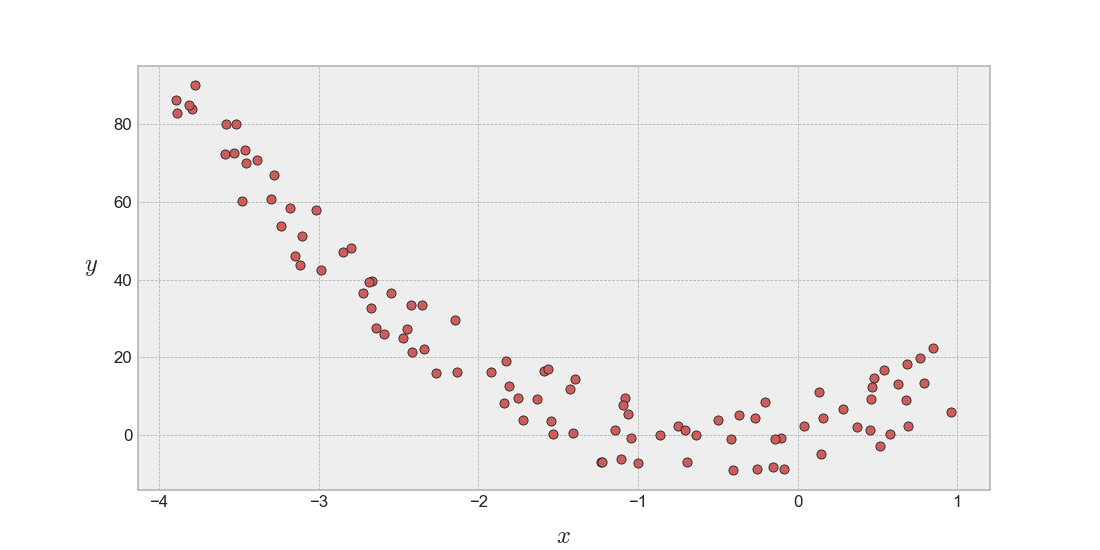

In [95]:
# Graficamos este dataset.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, color="indianred", ec="k")
ax.set_xlabel(r"$x$", fontsize=16, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=16, labelpad=15, rotation=0);

Evidentemente, una línea recta nunca se ajustará adecuadamente a este conjunto de datos. Por lo tanto, se hace necesaria la implementación de algún modelo no lineal. Para el caso de la regresión polinomial, **<font color='mediumorchid'>Scikit-Learn</font>** nos provee de la clase `PolynomialFeatures` (en el módulo `sklearn.preprocessing`), la cual nos permitirá transformar nuestro conjunto de datos, añadiendo las combinaciones polinómicas que deseemos. Para ello, debemos definir primeramente el grado de la regresión usando el hiperparámetro `degree`:

In [96]:
from sklearn.preprocessing import PolynomialFeatures

In [97]:
# Instanciamos nuestro transformador.
poly = PolynomialFeatures(degree=2)

In [98]:
# Ajustamos este transformador a nuestros datos originales.
poly.fit(X)

PolynomialFeatures()

Las clases que involucran el pre-procesamiento de datos suelen recibir el nombre de **transformadores**, ya que su misión es precisamente transformar un dataset en otro que cumpla con ciertas características deseables. Estos transformadores se ajustan igual que un modelo, haciendo uso del método `fit()`. Sin embargo, para aplicarlos y, en efecto, transformar un conjunto de datos, hacen uso del método `transform()`:

In [99]:
# Transformamos nuestro conjunto de datos.
X_poly = poly.transform(X)

Si mostramos en pantalla nuestro conjunto de datos transformado, observaremos que ahora hay tres variables en vez de sólo una ($\mathbf{x}$): Una variable de sesgo que se añade al dataset cuyas instancias son todas iguales a 1, la variable original $\mathbf{x}$, y la misma variable elevada al cuadrado $\mathbf{x}^{2}$:

In [100]:
# Mostramos las primeras 5 filas del dataset transformado.
X_poly[:5]

array([[ 1.        ,  0.54290345,  0.29474416],
       [ 1.        , -0.50146433,  0.25146648],
       [ 1.        , -2.67065019,  7.13237245],
       [ 1.        ,  0.84588189,  0.71551617],
       [ 1.        , -0.10624548,  0.0112881 ]])

Con esta transformación ya realizada, sólo nos resta implementar un modelo de regresión lineal y estudiar sus resultados:

In [101]:
# Instanciamos el modelo.
model = LinearRegression()

In [102]:
# Ajustamos el modelo.
model.fit(X_poly, y)

LinearRegression()

In [103]:
# Y mostramos los coeficientes estimados.
print(f"a = {model.coef_[0][1]}")
print(f"b = {model.coef_[0][2]}")
print(f"c = {model.intercept_[0]}")

a = 8.558487331046775
b = 8.089928208841995
c = 1.114210255364661


Podemos observar que los valores obtenidos por el modelo son cercanos a los utilizados originalmente para generar nuestro dataset. A fin de observar las estimaciones obtenidas por el mismo, graficaremos los correspondientes resultados:

In [104]:
# Generamos un rango de valores a evaluar.
X_range = np.linspace(start=-4, stop=1, num=100).reshape(-1, 1)

In [105]:
# Transformamos el rango anterior.
X_range_poly = poly.transform(X_range)

In [106]:
# Obtenemos predicciones para estos valores.
y_pred = model.predict(X_range_poly)

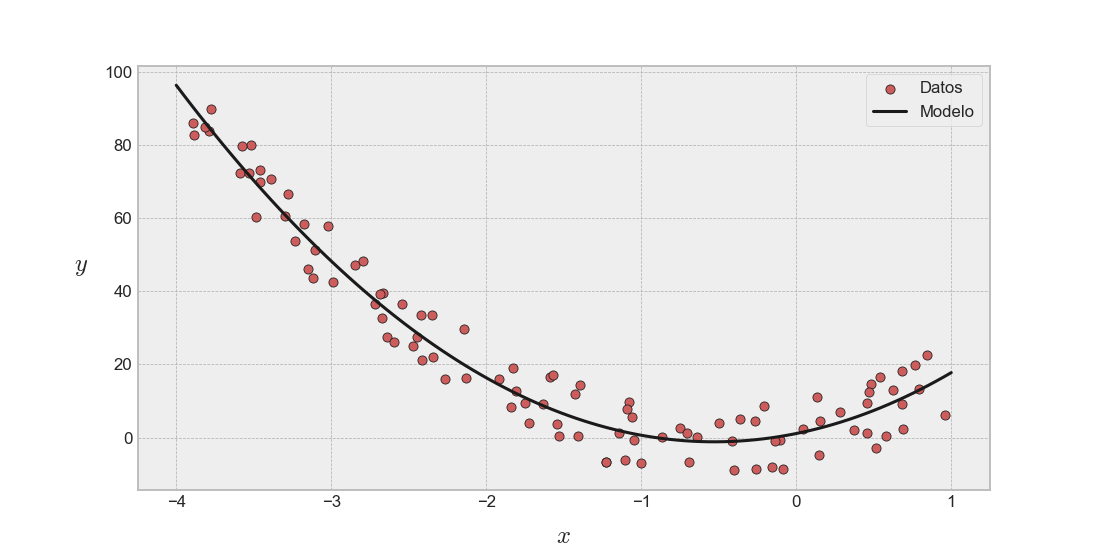

In [107]:
# Y graficamos los resultados.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, color="indianred", ec="k", label="Datos")
ax.plot(X_range, y_pred, color="k", label="Modelo")
ax.legend(loc="best", frameon=True)
ax.set_xlabel(r"$x$", fontsize=16, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=16, labelpad=15, rotation=0);

Notemos que la clase `PolynomialFeatures(degree=d)` transforma un arreglo que contiene $n$ atributos en otro arreglo que contendrá un total de $\frac{(n+d)!}{n!d!}$ atributos. Esto es, literalmente, una *explosión* de variables nuevas. Por lo tanto, no es recomendable usar esta transformación si nuestro conjunto de entrenamiento tiene demasiados atributos.

Con el modelo ya construido, ya estamos en condiciones de construir las correspondientes curvas de validación. Para ello, haremos uso de la función `validation_curve()`, la cual *vive* en el módulo `sklearn.model_selection`. Sin embargo, existe un problema. Esta función requiere de un único objeto que represente al modelo completo (que, conforme las reglas comentadas previamente para el caso de la API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>**, debe disponer de métodos tales como `fit()` y `predict()`), y nuestro modelo de regresión polinomial es el resultado del uso de dos objetos: Un transformador (`PolynomialFeatures`) y un modelo de regresión lineal que se aplica sobre un dataset transformado (`LinearRegression`). Necesitamos pues unir ambos objetos en uno solo.

Para lograr esto, nos ayudaremos de un concepto muy importante en el mundo del Análisis de Datos, llamado **pipeline**. Ahondaremos en detalles más adelante, así que por el momento, nos conformaremos con saber que una *pipeline* es un conjunto de entidades encargadas de procesar datos (de manera arbitraria), los cuales se conectan en serie a fin de secuenciar tales procesamientos en una única entidad colectiva, de manera tal que la salida de un procesamiento es entrada para el siguiente.

En términos prácticos, en este ejemplo, la *pipeline* que necesitamos construir encadena dos procesos: Un transformador polinómico y un modelo de regresión lineal que se aplica sobre la salida de dicho transformador. **<font color='mediumorchid'>Scikit-Learn</font>** nos provee de una clase que nos permite encadenar fácilmente una secuencia como ésta, llamada (sorpresivamente) `Pipeline`, y que dispone de un parámetro `steps`, el que nos permite listar la secuencia de objetos que compondrán la pipeline precisamente haciendo uso de una lista de Python, donde cada uno de sus elementos es una tupla del tipo `(nombre, objeto)`, donde `nombre` es un string que identificará al `objeto` que integraremos en la pipeline:

In [108]:
from sklearn.pipeline import Pipeline

In [109]:
# Construimos nuestra pipeline.
pipe = Pipeline(steps=[("poly_transformer", poly), ("regression", model)])

In [110]:
# Esta pipeline ya puede usarse para construir el modelo completo de una vez.
pipe.fit(X, y)

Pipeline(steps=[('poly_transformer', PolynomialFeatures()),
                ('regression', LinearRegression())])

In [111]:
# ... y obtener predicciones.
y_pred = pipe.predict(X_range)

Y ahora sí, ya podemos implementar las curvas de validación:

In [112]:
from sklearn.model_selection import validation_curve

In [113]:
# Definimos un rango de grados posibles para la regresión polinomial.
degrees = np.arange(start=0, stop=61, step=1)

In [114]:
# Implementación de las curvas de validación.
train_score, val_score = validation_curve(
    estimator=pipe, X=X, y=y, param_name="poly_transformer__degree", 
    param_range=degrees, cv=7, scoring="r2"
)

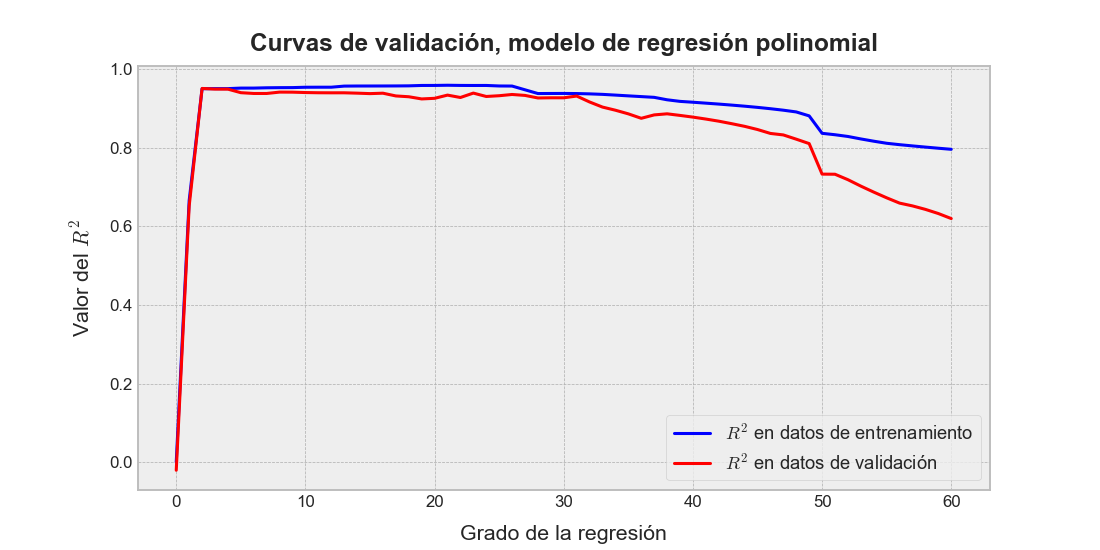

In [115]:
# Graficamos nuestros resultados.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(degrees, np.median(train_score, 1), color="blue", label=r"$R^{2}$ en datos de entrenamiento")
ax.plot(degrees, np.median(val_score, 1), color="red", label=r"$R^{2}$ en datos de validación")
ax.legend(loc="lower right", frameon=True, fontsize=12)
ax.set_xlabel("Grado de la regresión", fontsize=14, labelpad=10)
ax.set_ylabel("Valor del $R^{2}$", fontsize=14, labelpad=10)
ax.set_title(
    "Curvas de validación, modelo de regresión polinomial", 
    fontsize=16, fontweight="bold", pad=10
);

Podemos observar que el valor de la métrica $R^{2}$ crece enormemente a medida que el grado polinómico del modelo de regresión aumenta, hasta llegar a 4. Luego este valor empieza decrecer paulatinamente, comenzando a caer significativamente para los datos de validación con respecto a los datos de entrenamiento. Es claro que el trade-off óptimo entre sesgo y varianza para este modelo se encuentra para un grado igual a 4, puesto que es para este hiperparámetro donde la métrica de desempeño escogida llega a su máximo en ambos conjuntos de datos.

El gráfico anterior muestra precisamente el comportamiento cualitativo que esperamos: El desempeño del modelo en el conjunto de entrenamiento es siempre mayor que el logrado en el conjunto de validación, y es monótonamente creciente con respecto al aumento de la complejidad (grado) de regresión polinomial; y el desempeño del modelo en el conjunto de validación alcanza un máximo antes de que el mismo comience a sobreajustar la data de entrenamiento.

Notemos que la determinación de este modelo óptimo no requirió del cálculo de ninguna métrica de desempeño, sólo revisar la relación entre complejidad y flexibilidad del mismo. ◼︎

### Curvas de aprendizaje.
Si implementamos un modelo de regresión polinomial de grado muy alto, lo más probable es que obtengamos un mejor resultado, sobre los correspondientes datos de entrenamiento, que el que obtendríamos al implementar un sencillo modelo de regresión lineal. En los siguientes bloques de código se muestra la implementación de tres modelos para ajustar el conjunto de datos que generamos para el ejemplo (2.6): Un modelo lineal, un modelo polinomial cuadrático, y un modelo polinomial de grado 40.

In [116]:
# Instanciamos tres modelos, uno lineal y dos polinómicos.
mod1 = LinearRegression()
pipe1 = Pipeline(steps=[("transformer", PolynomialFeatures(degree=2)), ("regressor", LinearRegression())])
pipe2 = Pipeline(steps=[("transformer", PolynomialFeatures(degree=40)), ("regressor", LinearRegression())])

In [117]:
# Ajustamos nuestros modelos.
mod1.fit(X, y)
pipe1.fit(X, y)
pipe2.fit(X, y)

Pipeline(steps=[('transformer', PolynomialFeatures(degree=40)),
                ('regressor', LinearRegression())])

In [118]:
# Obtenemos predicciones para estos modelos.
y_pred1 = mod1.predict(X_range)
y_pred2 = pipe1.predict(X_range)
y_pred3 = pipe2.predict(X_range)

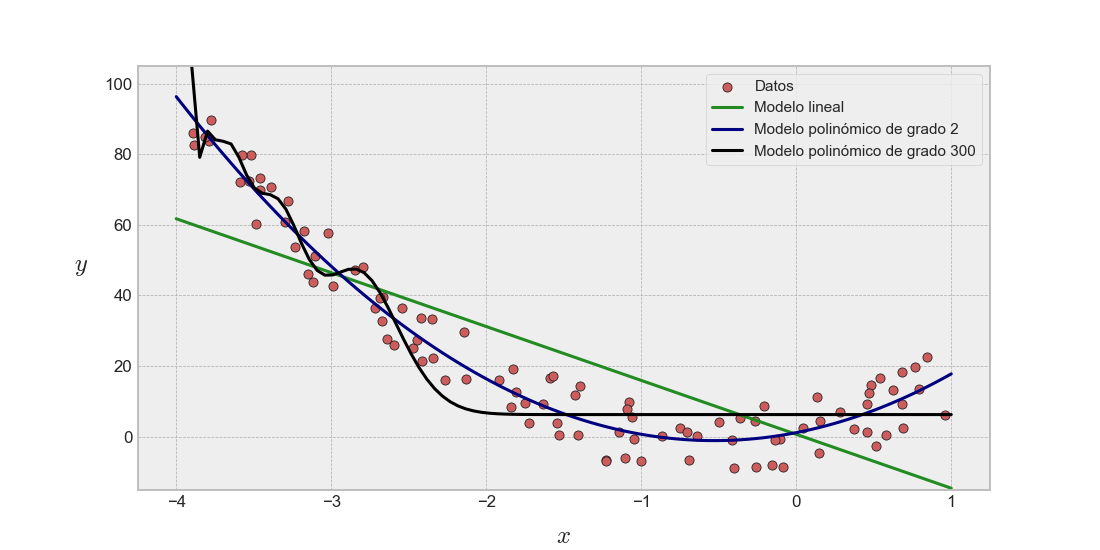

In [119]:
# Y graficamos los resultados de cada uno.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, color="indianred", ec="k", label="Datos")
ax.plot(X_range, y_pred1, color="forestgreen", label="Modelo lineal")
ax.plot(X_range, y_pred2, color="navy", label="Modelo polinómico de grado 2")
ax.plot(X_range, y_pred3, color="black", label="Modelo polinómico de grado 300")
ax.legend(loc="best", frameon=True, fontsize=10)
ax.set_xlabel(r"$x$", fontsize=16, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=16, labelpad=15, rotation=0)
ax.set_ylim(-15, 105);

Observemos que el modelo de grado 40 intenta forzar enormemente el ajuste en los datos de entrenamiento. Dicho modelo está, por tanto, sobreajustando severamente la data de entrenamiento, mientras que el modelo lineal está experimentando underfitting. En este caso, el modelo que mejor generaliza la información es el cuadrático, ya que sabemos que esta data fue generada a partir de una función cuadrática.

Una forma alternativa de determinar si estamos frente a un caso de overfitting o underfitting corresponde a la examinación de las **curvas de aprendizaje** del modelo respectivo. Corresponden a gráficos que muestran el desempeño de un modelo en los conjuntos de entrenamiento y validación como función del tamaño del conjunto de entrenamiento. Para generar estas curvas, debemos entrenar el modelo varias veces en distintos subconjuntos de entrenamiento que, por supuesto, difieren en tamaño, con frecuencia de manera incremental.

En el siguiente ejemplo, describiremos rápidamente cómo construir estas curvas en **<font color='mediumorchid'>Scikit-Learn</font>**.

**Ejemplo 2.7 – Curvas de aprendizaje en <font color='mediumorchid'>Scikit-Learn</font>:** Consideremos nuevamente el conjunto de datos **<font color='forestgreen'>DIGITS</font>**. Vamos a mostrar cómo podemos construir curvas de aprendizaje a fin de mostrar el efecto de ir añadiendo cada vez más instancias durante el proceso de entrenamiento de un modelo, donde dicho efecto puede cuantificarse a partir del desempeño de los modelos construidos a medida que dichas instancias aumentan el tamaño del conjunto de entrenamiento.

Para ilustrar estas curvas existen varias alternativas. Las últimas versiones de **<font color='mediumorchid'>Scikit-Learn</font>** vienen equipadas con clases que permiten construir rápidamente tales curvas, aunque esos recursos pueden ser incompatibles con algunas versiones (no tan) anteriores de Anaconda. Por esa razón, procederemos a construir curvas de aprendizaje de manera un tanto más *artesanal*, definiendo un proceso iterativo en el cual aumentaremos gradualmente el tamaño del conjunto de entrenamiento. para este propósito, haremos uso de la función `learning_curve()`, disponible en el módulo `sklearn.model_selection`. Esta función es capaz de entrenar un modelo en una cantidad a definir de conjuntos de entrenamiento de distintos tamaños, siguiendo un proceso de validación cruzada:

In [120]:
from sklearn.model_selection import learning_curve

In [121]:
# Generamos los datos necesarios para construir las curvas de aprendizaje. En este caso, el modelo a testear
# corresponde a un sencillo modelo Bayesiano ingenuo, usando la exactitud como métrica de desempeño.
train_sizes, train_scores, test_scores = learning_curve(
    estimator=GaussianNB(), X=digits["data"], y=digits["target"], 
    cv=5, scoring="accuracy", train_sizes=np.arange(30, 1410, 47).astype(int)
)

En el código anterior, observamos que la función `learning_curve()` nos pide varios argumentos: `estimator`, que corresponde a un modelo instanciado propio de la API de **<font color='mediumorchid'>Scikit-Learn</font>**, el cual puede ser igualmente un objeto de tipo `Pipeline` (que, de hecho, es nuestro caso); `X` e `y`, que son los datos de entrada y objetivo de nuestro problema; `cv`, que corresponde al esquema de validación cruzada a seguir (en este caso, 5 subconjuntos de validación); `scoring`, que define la métrica de desempeño a utilizar como base para la construcción de las curvas de aprendizaje; y `train_sizes`, que es una secuencia donde especificamos el número de instancias totales que usaremos del conjunto de entrenamiento en cada caso (con un máximo del 80% de las mismas).

Con los datos ya listos, sólo nos resta graficar las curvas obtenidas:

In [122]:
# Calculamos los valores medios de exactitud para los datos de entrenamiento y validación.
train_mean_score = train_scores.mean(axis=1)
test_mean_score = test_scores.mean(axis=1)

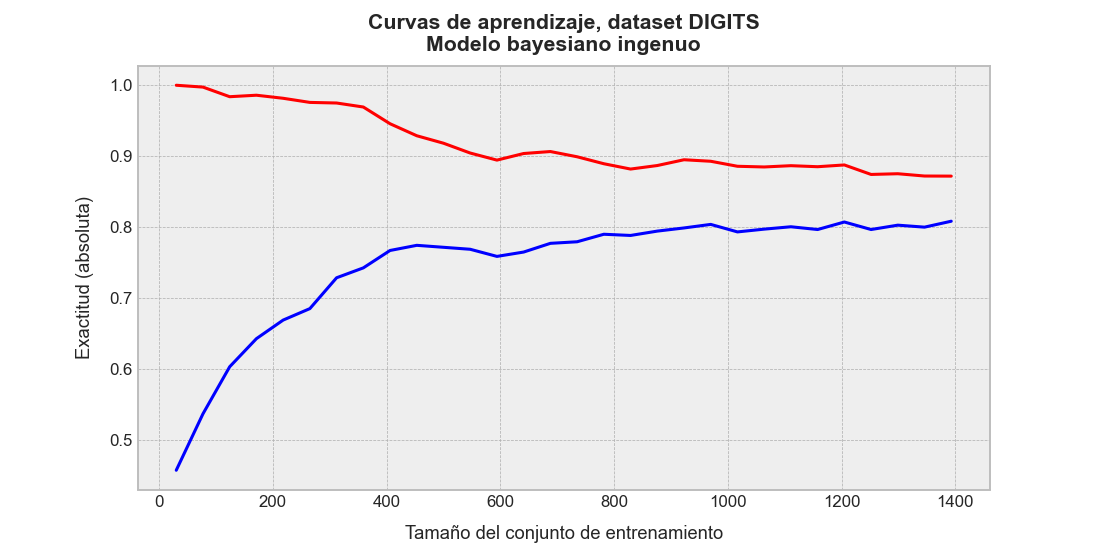

In [123]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_sizes, train_mean_score, color="red", lw=2, label="Conjunto de entrenamiento")
ax.plot(train_sizes, test_mean_score, color="blue", lw=2, label="Conjunto de prueba")
ax.set_xlabel("Tamaño del conjunto de entrenamiento", fontsize=12, labelpad=10)
ax.set_ylabel("Exactitud (absoluta)", fontsize=12, labelpad=10)
ax.set_title("Curvas de aprendizaje, dataset DIGITS\nModelo bayesiano ingenuo", fontsize=14, fontweight="bold", pad=10);

Podemos observar que la exactitud del modelo comienza a decrecer a medida que el conjunto de entrenamiento aumenta de tamaño, siendo la tasa de decrecimiento cada vez menor (a partir, aproximadamente, de 600 instancias de entrenamiento). Por otro lado, la exactitud sobre los datos de validación crece conforme el número de instancias de entrenamiento aumenta, presentándose igualmente un punto de inflexión aproximadamente en un valor igual a 400 instancias. El trade-off óptimo de sesgo y varianza se presenta en el punto para el cual la diferencia entre el desempeño del modelo en los conjuntos de entrenamiento y de prueba es mínimo, o bien, cuando su tasa de crecimiento es despreciable. Este último es el caso para nuestro ejemplo, ya que la diferencia se va haciendo cada vez más pequeña, pero la tasa de decrecimiento de dicha diferencia se hace cada vez menor.

Las últimas versiones de **<font color='mediumorchid'>Scikit-Learn</font>** (desde la `1.2.0`) disponen de la clase `LearningCurveDisplay` para la construcción de curvas de aprendizaje, en el módulo `sklearn.model_selection`, la que a su vez dispone del método `from_estimator`, el cual permite especificar el modelo a evaluar y una serie de parámetros propios del gráfico a construir. En este ejemplo en particular, usaremos una estrategia de mezcla de instancias en el conjunto de entrenamiento a fin de implementar la validación curzada, aumentando la aleatoriedad del muestreo, usando la clase `ShuffleSplit`:

In [124]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

In [125]:
# Definimos un diccionario con los parámetros a imputar en nuestra clase.
common_params = {
    "X": digits["data"],
    "y": digits["target"],
    "train_sizes": np.arange(30, 1410, 47).astype(int),
    "cv": ShuffleSplit(random_state=42),
    "score_type": "both",
    "line_kw": {"lw": 2},
    "std_display_style": "fill_between",
    "score_name": "Exactitud",
}

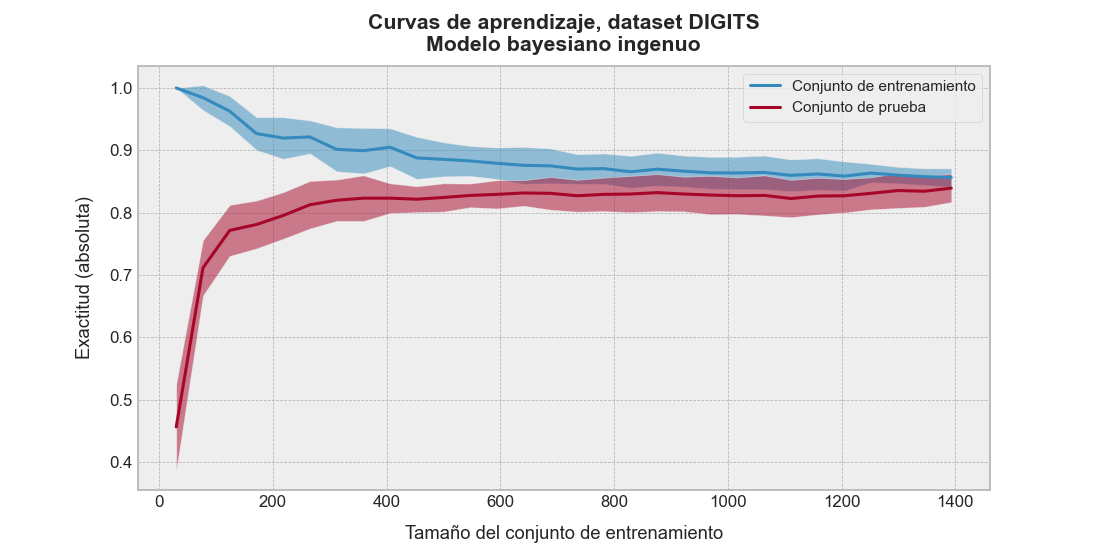

In [126]:
# Construimos nuestras curvas de aprendizaje.
fig, ax = plt.subplots(figsize=(10, 5))
LearningCurveDisplay.from_estimator(estimator=GaussianNB(), **common_params, ax=ax)
ax.legend(["Conjunto de entrenamiento", "Conjunto de prueba"], fontsize=10, frameon=True)
ax.set_xlabel("Tamaño del conjunto de entrenamiento", fontsize=12, labelpad=10)
ax.set_ylabel("Exactitud (absoluta)", fontsize=12, labelpad=10)
ax.set_title("Curvas de aprendizaje, dataset DIGITS\nModelo bayesiano ingenuo", fontsize=14, fontweight="bold", pad=10);

Las curvas obtenidas son las mismas que antes, con el detalle (muy útil) que ahora se muestra una banda de incertidumbre para cada una, resultado del proceso de validación cruzada seleccionado para esta evaluación. ◼︎

El **comportamiento general** que esperaríamos de una curva de aprendizaje se resume a continuación:

- Un modelo de complejidad fija experimentará overfitting en un dataset de tamaño pequeño: Esto significa que el desempeño del modelo en el conjunto de entrenamiento será relativamente alto, pero el desempeño en el conjunto de validación será relativamente bajo.
- Un modelo de complejidad fija experimentará underfitting en un dataset de tamaño grande: Esto significa que el desempeño del modelo en el conjunto de entrenamiento tenderá a decrecer, pero el desempeño en el conjunto de validación tenderá a ser creciente.
- Un modelo nunca, excepto por alguna situación puramente casual, puede generar scores mayores en los datos de validación que en los datos de entrenamiento: Esto significa que, en el caso límite, las curvas de aprendizaje serán siempre asintóticamente paralelas.

El esquema general de las curvas de aprendizaje se muestra en la Fig. (2.6). El atributo más notable de estas curvas corresponde a la convergencia de ambas a un determinado valor de desempeño. En particular, esto significa que, dado un número de datos de entrenamiento para el cual ocurre esto, la adición de más data no generará mejoras en el desempeño de nuestro modelo.

<p style="text-align: center;"><img src="figures/fig_2_6.png" width="700"></p>
<p style="text-align: center;">Fig. (2.6): Curvas de aprendizaje generales para modelos predictivos</p>

Las curvas de aprendizaje constituyen un diagnóstico valioso, porque nos entregan una explicación razonable y visual de cómo nuestro modelo responde a crecimientos en el número de instancias del conjunto de entrenamiento. En particular, cuando nuestra curva de aprendizaje ha convergido (esto es, cuando ambas curvas son –ojalá– asintóticamente paralelas), la adición de más instancias de entrenamiento no generará mejoras de ningún tipo en nuestro modelo.

En el caso anterior, la única forma de generar ajustes de mayor calidad, es usualmente recurrir a otros algoritmos de aprendizaje, comúnmente de mayor complejidad. Pero en definitiva, tener a mano las curvas de aprendizaje de cualquier modelo que hayamos construido nos permite tener una idea razonable en relación a quedarnos con un modelo o ir por alternativas mejores.

### Búsqueda de hiperparámetros por medio de grillas.
La discusión anterior tenía como objetivo formular algunos conceptos básicos relativos al trade-off entre sesgo y varianza, y su dependencia en la complejidad del modelo respectivo y del tamaño del conjunto de entrenamiento. En la práctica, los modelos generalmente tienen más de una única *perilla* que podemos mover y, por tanto, las curvas de aprendizaje o validación pasan ahora a ser hipersuperficies es espacios de, a veces, muchas dimensiones. En tales casos, la visualización deja de ser una opción y debemos recurrir a técnicas de selección más sofisticadas.

**<font color='mediumorchid'>Scikit-Learn</font>** nos provee de algunas herramientas automatizadas para verificar este tipo de selecciones, siendo las herramientas de **búsqueda de hiperparámetros** las más utilizadas en la práctica. Ahondaremos en esto en una sección especialmente dedicada para ello, incluso describiendo el uso de librerías especializadas en calibración de modelos a partir de hiperparámetros optimizados tales como **<font color='mediumorchid'>Optuna</font>**, pero por el momento, nos conformaremos con revisar algunas de las opciones disponibles en **<font color='mediumorchid'>Scikit-Learn</font>**, y que se denominan como **búsqueda por grillas**.

Supongamos que disponemos de un modelo que contiene $p$ hiperparámetros que pueden tomar $k_{1},...,k_{p}$ valores distintos, respectivamente. El número posible de hiperparámetros que podemos escoger es, por tanto, un dominio en $\mathbb{R}^{p}$ compuesto por un total de $k_{1}\cdots k_{p}$ puntos, llamado **espacio de parámetros** del modelo en cuestión. La búsqueda por grillas es un recurso en el cual una serie de combinaciones de los $p$ hiperparámetros se evalúa por medio de una métrica de desempeño previamente escogida, haciendo uso de una estrategia de validación adecuada (comúnmente validación cruzada), rankeando luego los valores de estas métricas y escogiendo como **mejor modelo** a aquel que produce los mejores desempeños sobre los correspondientes datos de validación. Dependiendo de si evaluamos cada posible combinación de hiperparámetros o sólo una fracción de ellas escogidas aleatoriamente, hablamos de **búsquedas regularizadas** o **búsquedas aleatorizadas**, respectivamente, las cuales se encuentran disponibles en **<font color='mediumorchid'>Scikit-Learn</font>**, en su módulo `sklearn.model_selection`, por medio de las clases `GridSearchCV` y `RandomSearchCV`, respectivamente.

Ambas clases, `GridSearchCV` y `RandomSearchCV`, vienen equipadas con métodos que se heredan de los correspondientes modelos previamente instanciados, y que permiten realizar ajustes (`fit()`) y predicciones (`predict()`) sobre un conjunto dado de datos. Algunos de ellos son los siguientes:

- `estimator`: El modelo a evaluar por medio de este procedimiento. Puede ser un objeto ya instanciado, una pipeline, o una clase con sus correspondientes parámetros base (como `random_state`).
- `params_grid`: Un diccionario que especifica todos los hiperparámetros que deseamos evaluar por medio de la búsqueda. Cada uno de los valores de estos hiperparámetros se especifica mediante alguna secuencia tal como una lista de Python o un arreglo de **<font color='mediumorchid'>Numpy</font>**, incluyendo estructuras que permiten especificar rangos para una distribución dada típicos del módulo de estadística de **<font color='mediumorchid'>Scipy</font>**.
- `scoring`: La métrica de desempeño que definirá los resultados de la evaluación de cada combinación de hiperparámetros. Es posible utilizar más de una métrica si se imputa una lista con strings que las definan (conforme la [lista de métricas disponibles](https://scikit-learn.org/stable/modules/model_evaluation.html) en **<font color='mediumorchid'>Scikit-Learn</font>**).
- `refit`: Permite determinar una métrica (de las especificadas mediante el parámetro `scoring`) para ajustar un modelo usando la mejor combinación encontrada de hiperparámetros en la búsqueda.
- `cv`: Permite definir la estrategia de validación cruzada a utilizar durante los subsecuentes entrenamientos de los modelos en cada combinación de hiperparámetros. Hasta ahora, hemos utilizado simplemente números enteros para definir una estrategia estática, que simplemente considera una cantidad $k$ de separaciones del conjunto de entrenamiento, pero existen clases que permiten definir estrategias más sofisticadas, como veremos más adelante.

En el siguiente ejemplo, usaremos una búsqueda regularizada usando la clase `GridSearchCV` a fin de mostrar el funcionamiento de este tipo de estrategia.

**Ejemplo 2.8 – Búsqueda regularizada de hiperparámetros en <font color='mediumorchid'>Scikit-Learn</font>:** Consideremos, una vez más, el *toyset* <font color='forestgreen'>DIGITS</font>. Intentaremos ajustar un modelo basado en un algoritmo de aprendizaje denominado **máquina de soporte vectorial**, que revisaremos en detalle en secciones posteriores. Este algoritmo es muy adecuado para abordar problemas de clasificación de todo tipo, y se encuentra disponible en el módulo `sklearn.svm`, haciendo uso de la clase `SVC`. Esta clase posee dos hiperparámetros esenciales: `kernel`, que permite especificar una transformación basada en funciones de kernel (como las vistas en la [clase 4.1](https://github.com/rquezadac/udd_data_analytics_lectures/blob/main/Seccion%204%20-%20Introducci%C3%B3n%20al%20an%C3%A1lisis%20num%C3%A9rico%20y%20simb%C3%B3lico%20con%20Scipy%20y%20Sympy/clase_4_1.ipynb) del repositorio de [Análisis de Datos](https://github.com/rquezadac/udd_data_analytics_lectures/tree/main)), a fin de poder manejar problemas tanto lineales como no lineales; y `C`, que es un parámetro que se mueve entre 0 y 1 y permite igualmente moldear (el término correcto es **regularizar**) nuestro modelo a la geometría inherente a los datos.

Partimos pues importando la clase con la cual instanciaremos el modelo:

In [127]:
from sklearn.svm import SVC

In [128]:
# Instanciamos nuestro modelo.
svm = SVC()

Ahora definiremos la grilla que contendrá todos los hiperparámetros a evaluar:

In [129]:
# Grilla de hiperparámetros.
params_grid = {
    "kernel": ["linear", "rbf", "sigmoid", "poly"],
    "C": np.linspace(start=0.1, stop=1.0, num=10),
}

Y ya estamos en condiciones de realizar la búsqueda de hiperparámetros óptimos para este modelo (ojo, este proceso puede tomar algunos minutos, dependiendo del hardware que poseamos):

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
# Instanciamos nuestra estrategia de búsqueda.
regularizer = GridSearchCV(estimator=svm, param_grid=params_grid, scoring="accuracy", refit="accuracy", cv=5)

In [132]:
# Realizamos la búsqueda.
regularizer.fit(X=digits["data"], y=digits["target"])

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             refit='accuracy', scoring='accuracy')

Con la búsqueda ya realizada, podemos visualizar rápidamente los resultados de la misma por medio del atributo `cv_results_`, el cual retorna un diccionario con todas las combinaciones de hiperparámetros testeadas en el modelo, conforme la estrategia de validación cruzada utilizada. Por simplicidad, podemos transformar dicho resultado a un DataFrame de **<font color='mediumorchid'>Pandas</font>** o **<font color='mediumorchid'>Polars</font>**, a fin de obtener una representación más razonable:

In [133]:
# Obtenemos los resultados de la búsqueda.
results = pl.DataFrame(regularizer.cv_results_)

In [134]:
# Mostramos los resultados en pantalla.
print(results[["param_C", "param_kernel", "mean_test_score", "rank_test_score"]].sort(by="rank_test_score").head())

shape: (5, 4)
┌────────────────────┬──────────────┬─────────────────┬─────────────────┐
│ param_C            ┆ param_kernel ┆ mean_test_score ┆ rank_test_score │
│ ---                ┆ ---          ┆ ---             ┆ ---             │
│ object             ┆ object       ┆ f64             ┆ i32             │
╞════════════════════╪══════════════╪═════════════════╪═════════════════╡
│ 0.7000000000000001 ┆ poly         ┆ 0.970512        ┆ 1               │
│ 0.8                ┆ poly         ┆ 0.970512        ┆ 1               │
│ 0.9                ┆ poly         ┆ 0.970511        ┆ 3               │
│ 1.0                ┆ poly         ┆ 0.970511        ┆ 3               │
│ 0.6                ┆ poly         ┆ 0.969955        ┆ 5               │
└────────────────────┴──────────────┴─────────────────┴─────────────────┘


Podemos observar que la mejor combinación de hiperparámetros encontrada por nuestra grilla de búsqueda es tal que el modelo SVM debe tener un kernel polinómico (`poly`), con un valor de `C` igual a `0.7`. Aún no sabemos qué representan estos valores, es cierto, pero esta combinación produce un modelo cuya exactitud en datos de validación (cruzada) es de más de un 97%.

Siempre podremos obtener el mejor modelo de todos los encontrados mediante el atributo `best_estimator_`:

In [135]:
# Obtenemos el mejor de todos los modelos.
model = regularizer.best_estimator_

In [136]:
# Mostramos este modelo en pantalla.
model

SVC(C=0.7000000000000001, kernel='poly')

En la próxima sección abordaremos algunos aspectos más detallados del proceso de optimización de hiperparámetros. ◼︎

## Una introducción al pre-procesamiento de datos categóricos.
Previamente comentamos algunas de las nociones fundamentales de la implementación de modelos de machine learning en **<font color='mediumorchid'>Scikit-Learn</font>**, pero en todos los ejemplos desarollados asumimos que la data a utilizar viene siempre en el mismo formato amigable, del tipo `(n_samples, n_targets)`, siendo cada uno de los atributos del dataset de tipo numérico. Sin embargo, resulta que, en el mundo real, la data que nos interesa rara vez vendrá nativamente en este formato. Por lo tanto, uno de los pasos más importantes en la implementación de este tipo de modelos en la práctica corresponde al pre-procesamiento de datos: Esto es, tomar cualquier conjunto de datos que nos interese modelar y llevarlo a un formato tal que podamos construir la respectiva matriz de atributos y el vector de valores objetivo.

El pre-procesamiento de datos involucra, por norma general, la aplicación de transformaciones sobre nuestros conjuntos de datos, de tal forma que obtengamos otro conjunto, derivado del anterior, por medio de tales transformaciones. Estos conjuntos resultantes pueden o no preservar la cantidad de atributos del dataset original, sus órdenes de magnitud y sus densidades observadas de probabilidad. Ejemplos de estas transformaciones son la normalización, estandarización y transformación polinómica, que ya hemos visto en secciones anteriores. Y tales transformadores *residen*, en general, en el módulo `sklearn.preprocessing`.

En esta subsección estamos interesados en describir algunos transformadores que nos permitirán pre-procesar datos de tipo categóricos; es decir, data que representa estados de forma no numérica. Por ejemplo, supongamos que nos encontramos explorando algo de data relativa a camiones de extracción (CAEX) en una operación minera a cielo abierto que, además de poseer data numérica típica como el costo de capital del camión o su capacidad de tolva, también contiene data categórica, como la marca/modelo del camión. Por ejemplo, nuestra data podría parecerse a algo como esto:

In [137]:
# Data simulada que caracteriza a algunos camiones de extracción.
data = [
    {'price': 850000, 'capacity': 280, 'model': '793F'},
    {'price': 700000, 'capacity': 270, 'model': '789D'},
    {'price': 950000, 'capacity': 300, 'model': '794D'},
    {'price': 600000, 'capacity': 220, 'model': 'MT4400D AC'}
]

A fin de expresar el modelo de estos camiones de forma numérica, podríamos vernos tentados a generar una codificación que simplemente mapee cada modelo a un valor numérico de tipo correlativo. Por ejemplo:

In [138]:
{'793F': 1, '789D': 2, '794F': 3, 'MT4400 AC': 4}

{'793F': 1, '789D': 2, '794F': 3, 'MT4400 AC': 4}

Sin embargo, una codificación como ésta no es adecuada. **<font color='mediumorchid'>Scikit-Learn</font>** suele *entender* los datos numéricos en términos de sus relaciones de orden, por lo cual, naturalmente, una transformación de este tipo implicaría que `'789D' > '793F'`, porque `2 > 1`. Sin embargo, ésto no tiene sentido. De la misma forma, **<font color='mediumorchid'>Scikit-Learn</font>** podría interpretar que `'793F' + '798D' = '794D'`, ya que `1 + 2 = 3`, lo que, evidentemente, tampoco tiene sentido.

En un caso como éste, donde la similitud entre categorías distintas es un tema de importancia y no se ve representado en una transformación directa de la data original, lo más apropiado es aplicar una técnica de pre-procesamiento conocida en la práctica como **codificación de tipo “one-hot”**. Esta transformación permite crear una columna por categoría que entrega valores binarios, 1 para cuando dicha categoría se da en una determinada instancia, y 0 cuando no es así. Matemáticamente, si una variable categórica $\mathbf{x}\in \mathbb{R}^{m}$ puede tomar $k$ valores diferentes (donde $k$ es el número de instancias y $k<m$), una transformación de tipo *one-hot* simplemente crea $k$ variables nuevas, digamos $\mathbf{d}_{1},...,\mathbf{d}_{k}$, tales que, si $x_{i}=j$ (donde $1\leq j\leq k$), entonces $d_{is}=1$ para $s=j$, y $d_{is}=0$ para $s\neq j$, donde $d_{is}$ corresponde al valor de la variable nueva $\mathbf{d}_{s}$ para la instancia $i$.

La implementación de una codificación de tipo *one-hot* en **<font color='mediumorchid'>Scikit-Learn</font>** es sencilla, ya que el módulo `sklearn.preprocessing` dispone de la clase `OneHotEncoding` para tales fines. Consideremos pues un conjunto de datos como el siguiente, en el cual disponemos de mediciones (simuladas) de esfuerzos en una serie de puntos de extracción, cada una de las cuales lleva consigo una categoría relativa a la resistencia del punto a escala de macizo rocoso:

In [139]:
# Generamos una semilla aleatoria fija.
rng = np.random.default_rng(42)

In [140]:
# Simulamos nuestras mediciones de esfuerzos a partir de una distribución Gaussiana.
data = pd.DataFrame(data=rng.normal(loc=80, scale=40, size=(2000, 1)), columns=["resistencia"])

In [141]:
# Y asignamos categorías a las mediciones.
data["estado"] = np.where(
    data["resistencia"] < 30,
    "Calidad mala",
    np.where(
        data["resistencia"] > 110,
        "Calidad buena",
        "Calidad regular"
    )
)

In [142]:
# Mostramos las primeras filas de la data.
data.head()

,resistencia,estado
0,92.188683,Calidad regular
1,38.400636,Calidad regular
2,110.018048,Calidad buena
3,117.622589,Calidad buena
4,1.958592,Calidad mala


In [143]:
# Y observamos la distribución de las categorías de calidad de la roca en estos puntos.
data["estado"].value_counts()

estado
Calidad regular    1353
Calidad buena       409
Calidad mala        238
Name: count, dtype: int64

En este caso particular, un mapeo directo de categorías ordinales entre las calidades de roca previamente definidas sí tiene (al menos) algo de sentido, ya que, naturalmente, una calidad mala es peor que una regular, y una calidad regular es peor que una mala. Sin embargo, la suma de estas categorías (o cualquier otra operación aritmética) no tiene sentido y, por tanto, una codificación de tipo *one-hot* sería ideal para transformar la columna `"estado"` en tres columnas que permitan expresar la información de las correspondientes calidades de roca en cada punto de extracción:

In [144]:
from sklearn.preprocessing import OneHotEncoder

En general, los transformadores de data categórica vienen equipados con alguno de los siguientes argumentos:

- `categories`: La lista de categorías que deseamos reemplazar por números. Este argumento es completamente opcional, ya que su opción por defecto es `"auto"`, la que permite que **<font color='mediumorchid'>Scikit-Learn</font>** infiera a partir de los datos las categorías que se desean reemplazar. Dichas categorías pueden consultarse luego por medio del atributo `categories_` del transformador ya instanciado.
- `sparse_output`: Parámetro booleano que permite determinar si la data resultante de la transformación vendrá en un formato de matriz dispersa de bajo consumo de memoria de **<font color='mediumorchid'>Scipy</font>** o en un formato de arreglo común de **<font color='mediumorchid'>Numpy</font>**.

Luego tenemos:

In [145]:
# Instanciamos nuestro transformador.
encoder = OneHotEncoder(sparse_output=False)

In [146]:
# Y lo aplicamos a nuestra data.
encoder.fit(data["estado"].values.reshape(-1, 1))

OneHotEncoder(sparse_output=False)

En el bloque anterior, hemos redimensionado la serie `data["estado"]` debido a que cualquier objeto de **<font color='mediumorchid'>Scikit-Learn</font>** que pueda ajustarse a nuestros datos por medio del método `fit()` espera siempre un arreglo de tipo bidimensional.

El resultado de esta transformación es el siguiente:

In [147]:
# Obtenemos los datos transformados.
data_1hot = encoder.transform(data["estado"].values.reshape(-1, 1))

In [148]:
# Revisamos las categorías inferidas por nuestro transformador.
encoder.categories_

[array(['Calidad buena', 'Calidad mala', 'Calidad regular'], dtype=object)]

In [149]:
# Pasamos el resultado a un formato de DataFrame.
data_1hot = pd.DataFrame(
    data=data_1hot, 
    columns=["estado = Calidad buena", "estado = Calidad mala", "estado = Calidad regular"]
)

In [150]:
# Mostramos las primeras filas de los datos transformados.
data_1hot.head()

,estado = Calidad buena,estado = Calidad mala,estado = Calidad regular
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


Podemos observar que existe una desventaja evidente en este tipo de pre-procesamiento: Si nuestra variable categórica tiene demasiadas categorías, un encodeo de tipo “one-hot” creará un número equivalente de variables adicionales en nuestro dataset. Es por eso que, por defecto, el producto de estas clases corresponde a matrices de tipo dispersas de **<font color='mediumorchid'>Scipy</font>**: Permiten ahorrar una gran cantidad de memoria.

Más adelante, cuando estudiemos en detalle algunos casos más propios del mundo real, revisaremos otro tipo de transformadores aptos para pre-procesar atributos no numéricos.

## Comentarios finales.
Esta sección ha sido simplemente una ventana a un conjunto muy pequeño de cosas que podremos hacer a medida que vayamos cogiendo experiencia con **<font color='mediumorchid'>Scikit-Learn</font>** y, al mismo tiempo, nos vayamos interiorizando en trasfondo de los muchos algoritmos de aprendizaje que estudiaremos en este repositorio. Actualmente, el auge de los modelos de lenguaje de gran tamaño (*large language models*) se ha llevado casi la totalidad de la atención más mediática en el mundo de la inteligencia artificial. Sobretodo con la aparición de productos tan impresionantes como GPT-4 y LLaMa. Sin embargo, ningún viaje hacia el mundo de los algoritmos de aprendizaje puede prescindir de tópicos clásicos, y para todos aquellos interesados en explorar más allá del alcance de estos apuntes (por ejemplo, en el campo del aprendizaje profundo), este periplo en librerías tales como **<font color='mediumorchid'>Scikit-Learn</font>** será, incluso, esencial para entender muchísimos temas relativos a cuestiones de implementación.